<a href="https://colab.research.google.com/github/Truomghoccode/Bai-Tap-Lon/blob/main/Climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Khám phá và làm sạch dữ liệu




### khai báo thư viện cần thiết

In [179]:
#khai bao thu vien
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import urllib.request
import xarray as xr
import calendar
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [180]:
df = pd.read_csv('Data.csv')
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Ha Noi,19,12,6,NNE,0.0,70,44,1025,01/01/2009
1,Ha Noi,18,12,6,ESE,0.5,65,28,1025,02/01/2009
2,Ha Noi,20,13,5,ESE,0.7,74,40,1022,03/01/2009
3,Ha Noi,25,12,5,SSW,0.0,81,46,1018,04/01/2009
4,Ha Noi,23,14,5,S,1.3,90,75,1017,05/01/2009


### kiểm tra dữ liệu và làm sạch

In [181]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,29.489998,21.721257,8.382282,4.177028,74.206419,50.408661,1011.211695
std,6.217772,4.911990,3.186597,8.931418,10.925099,26.183295,6.898611
min,7.000000,2.000000,2.000000,0.000000,28.000000,0.000000,993.000000
25%,25.000000,19.000000,6.000000,0.000000,68.000000,30.000000,1005.000000
50%,30.000000,23.000000,8.000000,0.900000,76.000000,49.000000,1011.000000
75%,34.000000,26.000000,10.000000,4.500000,82.000000,71.000000,1016.000000
max,45.000000,32.000000,25.000000,203.200000,97.000000,100.000000,1037.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  4549 non-null   object 
 1   max       4549 non-null   int64  
 2   min       4549 non-null   int64  
 3   wind      4549 non-null   int64  
 4   wind_d    4549 non-null   object 
 5   rain      4549 non-null   float64
 6   humidi    4549 non-null   int64  
 7   cloud     4549 non-null   int64  
 8   pressure  4549 non-null   int64  
 9   date      4549 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 355.5+ KB


In [183]:
df.isna().sum()


province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

- Dữ liệu sạch

- kiểm tra các kiểu dữ liệu trong data


In [184]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

### tách dữ liệu để trực quan hóa


In [185]:
df2 = pd.DataFrame(df,columns=['date'])
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
years = df['year'].unique()
df.head(15)

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,year,month
0,Ha Noi,19,12,6,NNE,0.0,70,44,1025,2009-01-01,2009,1
1,Ha Noi,18,12,6,ESE,0.5,65,28,1025,2009-01-02,2009,1
2,Ha Noi,20,13,5,ESE,0.7,74,40,1022,2009-01-03,2009,1
3,Ha Noi,25,12,5,SSW,0.0,81,46,1018,2009-01-04,2009,1
4,Ha Noi,23,14,5,S,1.3,90,75,1017,2009-01-05,2009,1
5,Ha Noi,23,15,5,E,2.2,88,59,1018,2009-01-06,2009,1
6,Ha Noi,15,13,9,NNE,1.1,85,95,1023,2009-01-07,2009,1
7,Ha Noi,15,12,8,E,0.5,78,91,1026,2009-01-08,2009,1
8,Ha Noi,19,11,10,SE,0.1,61,23,1029,2009-01-09,2009,1
9,Ha Noi,22,8,6,ENE,0.0,50,2,1027,2009-01-10,2009,1


In [186]:
df = df.drop_duplicates(subset=['year','month'])
df2 = df.pivot(index='month',columns='year' , values = 'max')


In [187]:
import numpy as np
from sklearn.linear_model import LinearRegression
df = df.assign(avg_temp=(df['max'] + df['min']) / 2) #tính nhiệt độ trung bình qua từng năm 
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,year,month,avg_temp
0,Ha Noi,19,12,6,NNE,0.0,70,44,1025,2009-01-01,2009,1,15.5
31,Ha Noi,19,14,3,ENE,0.8,91,85,1018,2009-02-01,2009,2,16.5
59,Ha Noi,17,17,7,NNE,5.1,80,100,1017,2009-03-01,2009,3,17.0
90,Ha Noi,24,17,6,E,3.1,85,99,1017,2009-04-01,2009,4,20.5
120,Ha Noi,30,22,9,ESE,1.6,81,61,1014,2009-05-01,2009,5,26.0


# Trực quan hóa dữ liệu

- Sử dụng biểu đồ đường để có thể thấy được sự biến đổi qua các năm

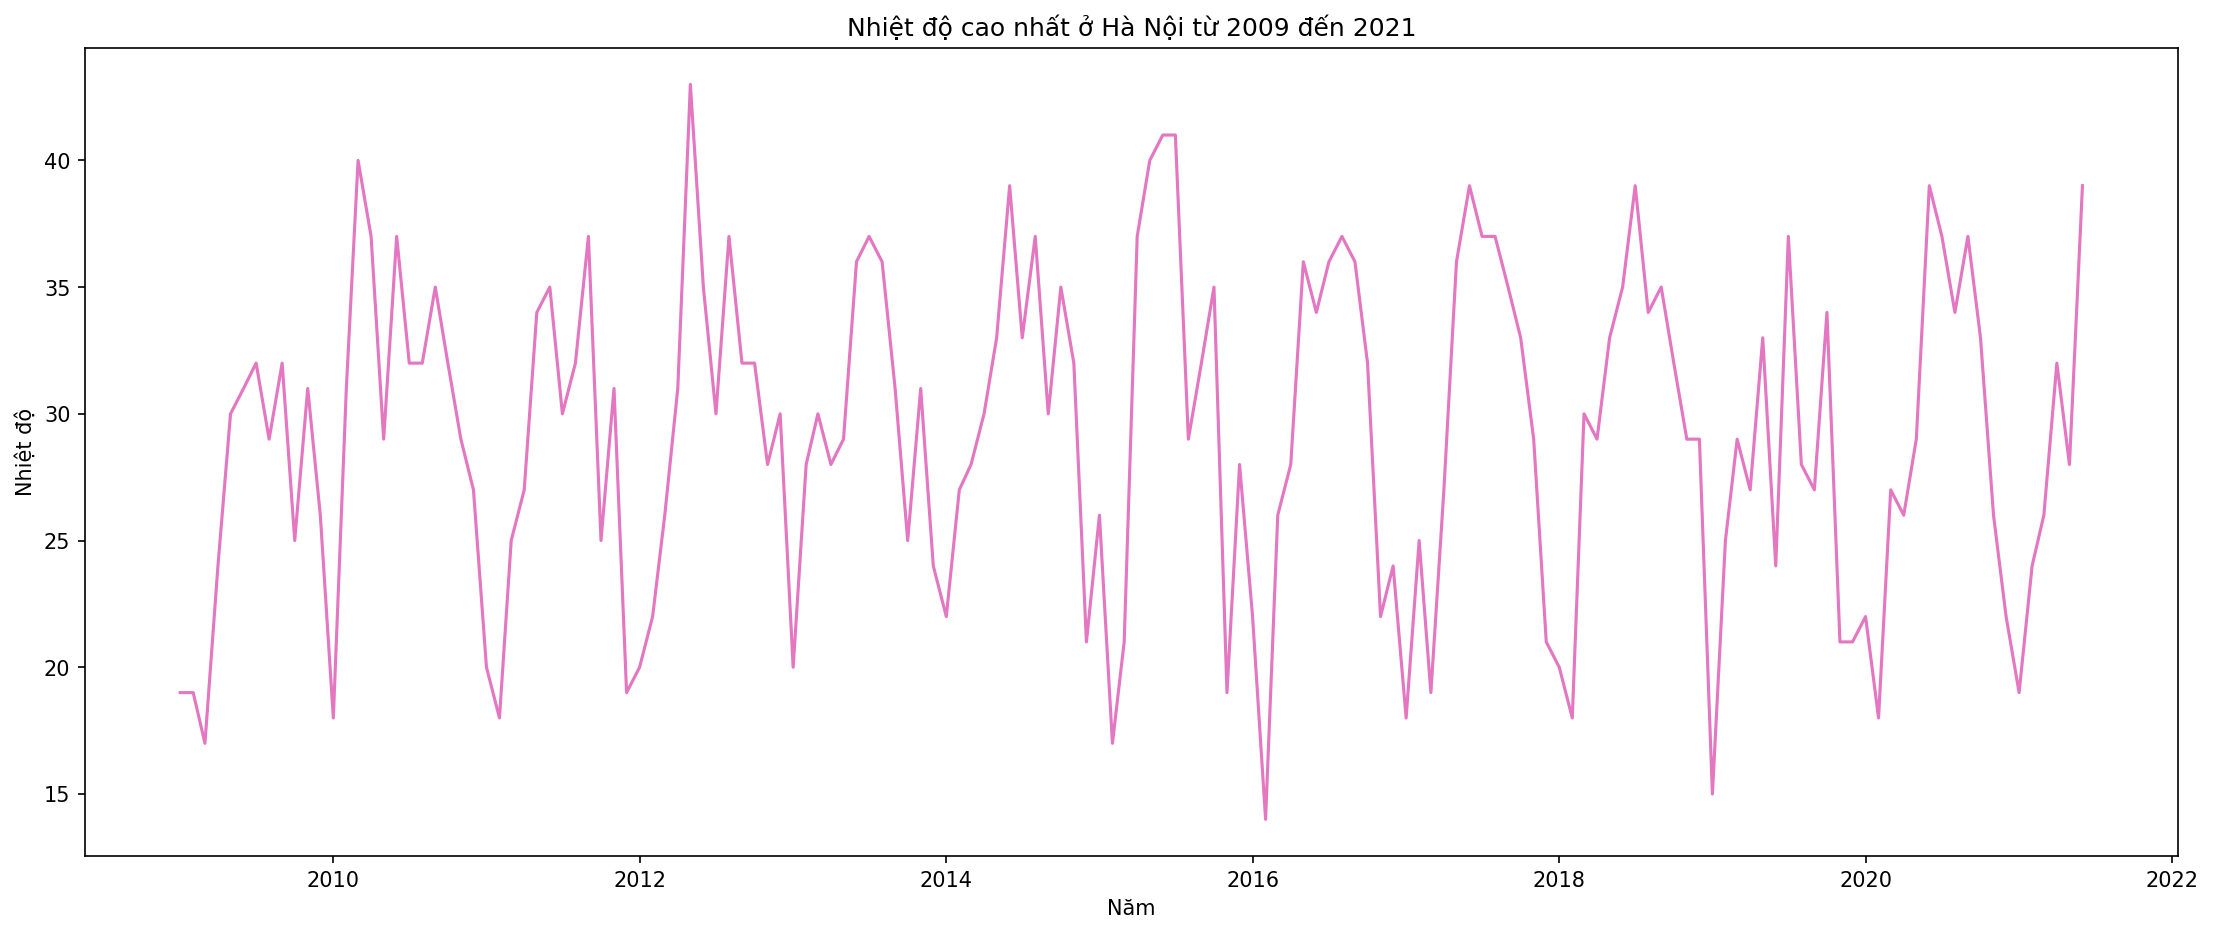

In [188]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['max'], title='Nhiệt độ cao nhất ở Hà Nội từ 2009 đến 2021', color="tab:pink")

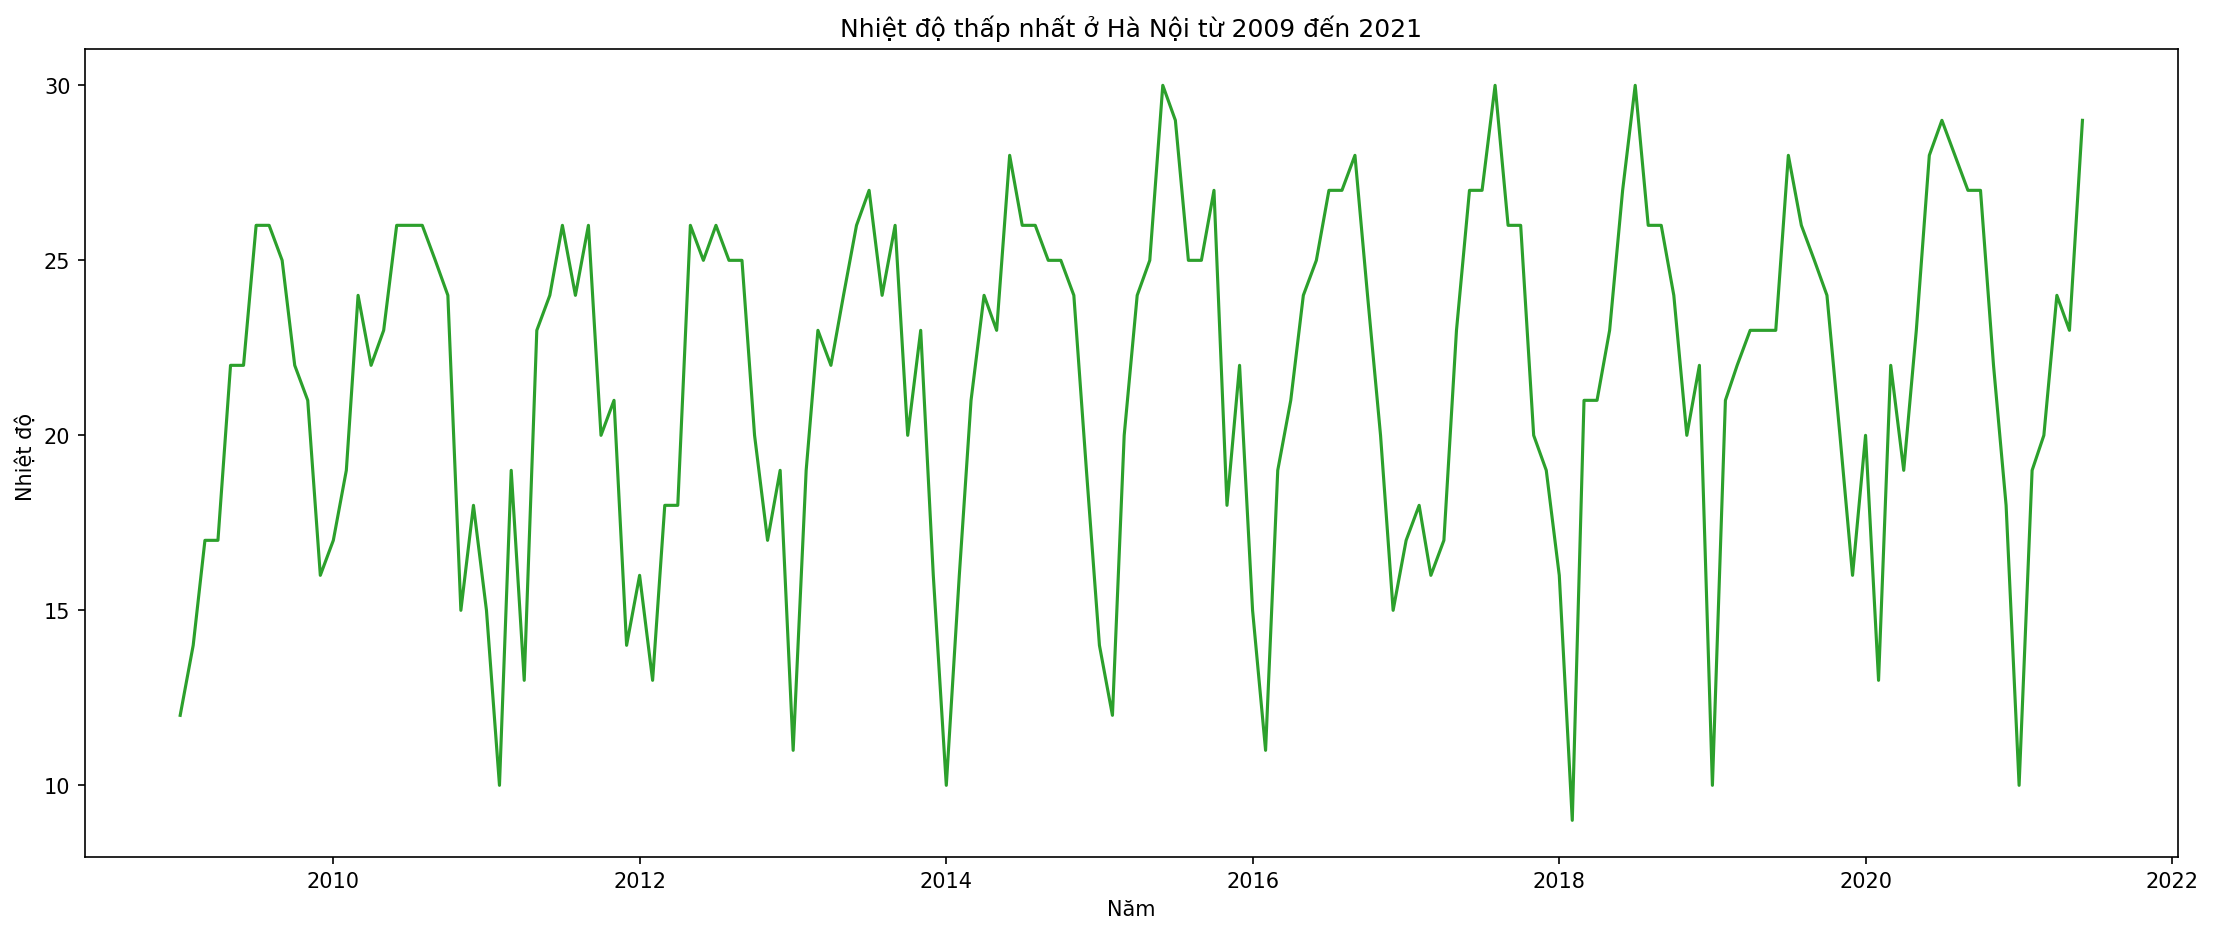

In [189]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ ', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['min'], title='Nhiệt độ thấp nhất ở Hà Nội từ 2009 đến 2021', color="tab:green")

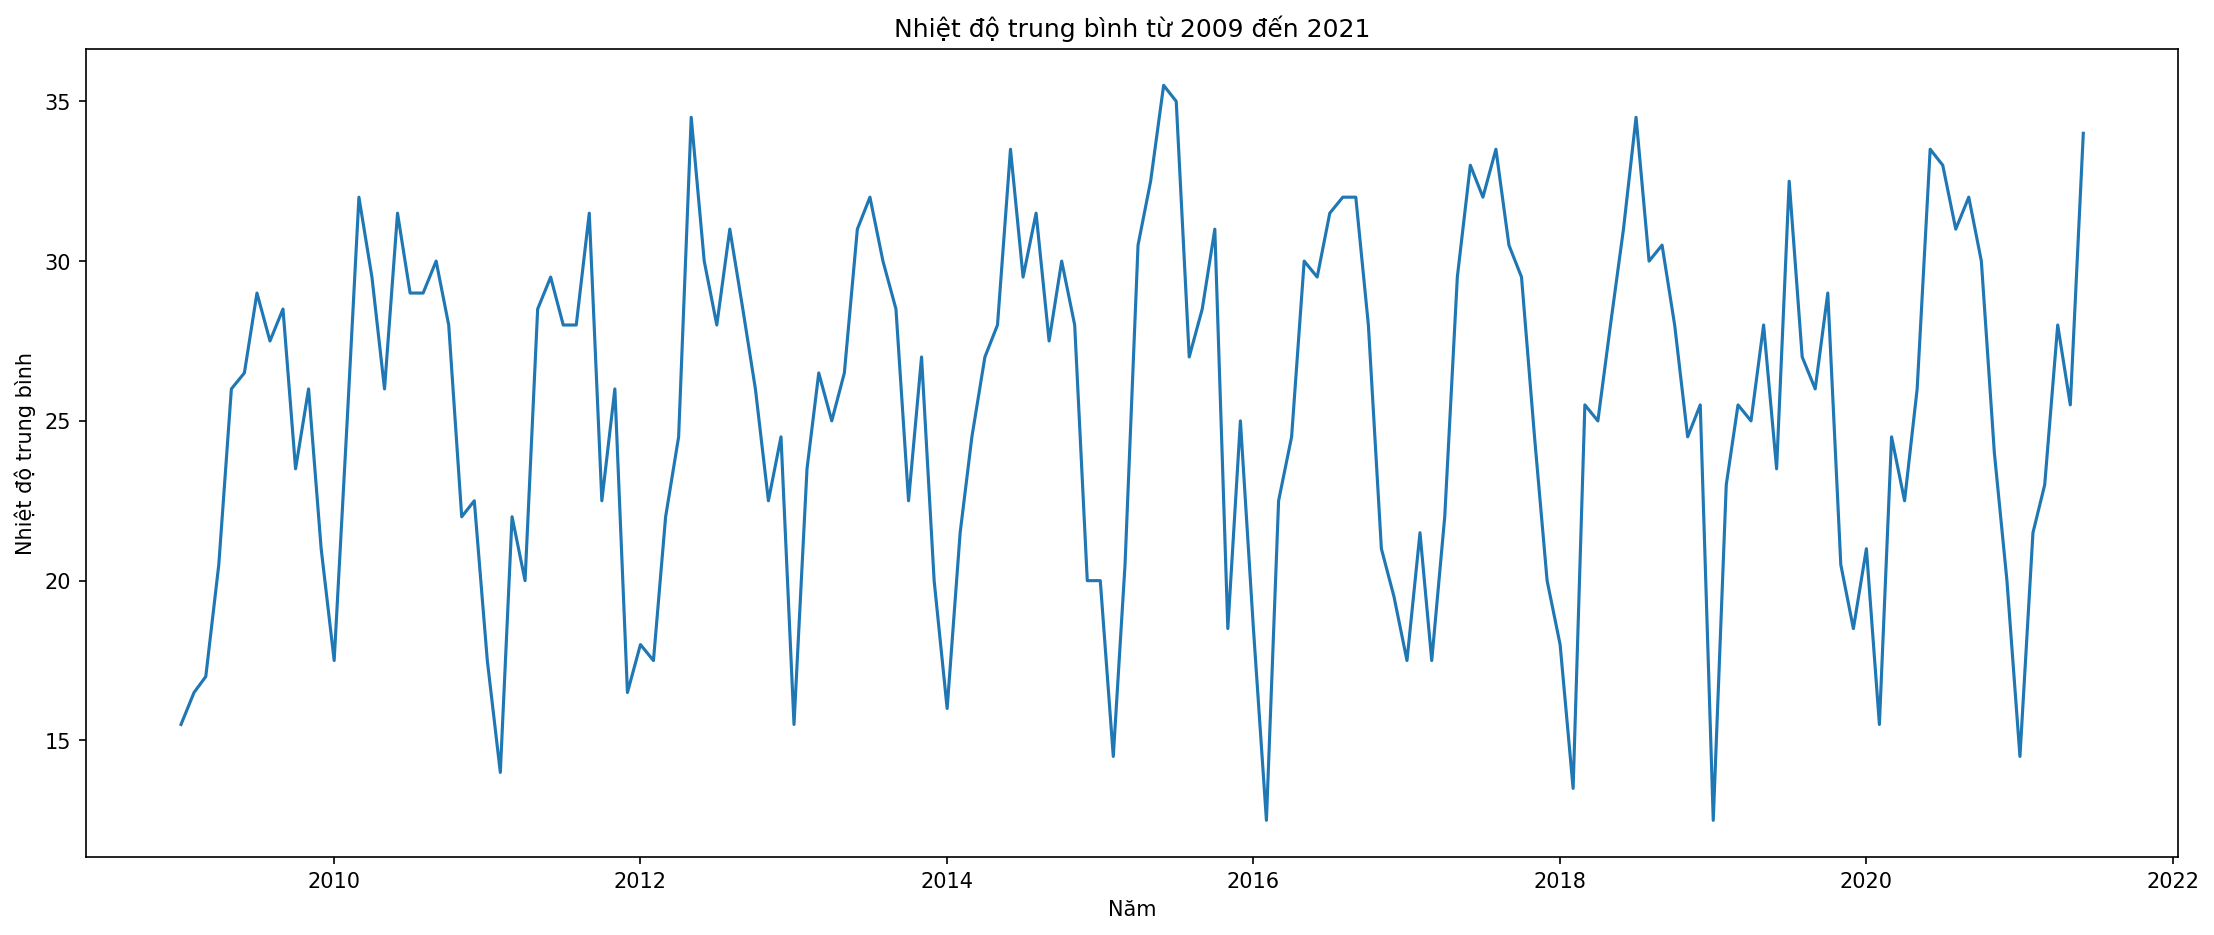

In [190]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ trung bình', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['avg_temp'], title='Nhiệt độ trung bình từ 2009 đến 2021', color="tab:blue")

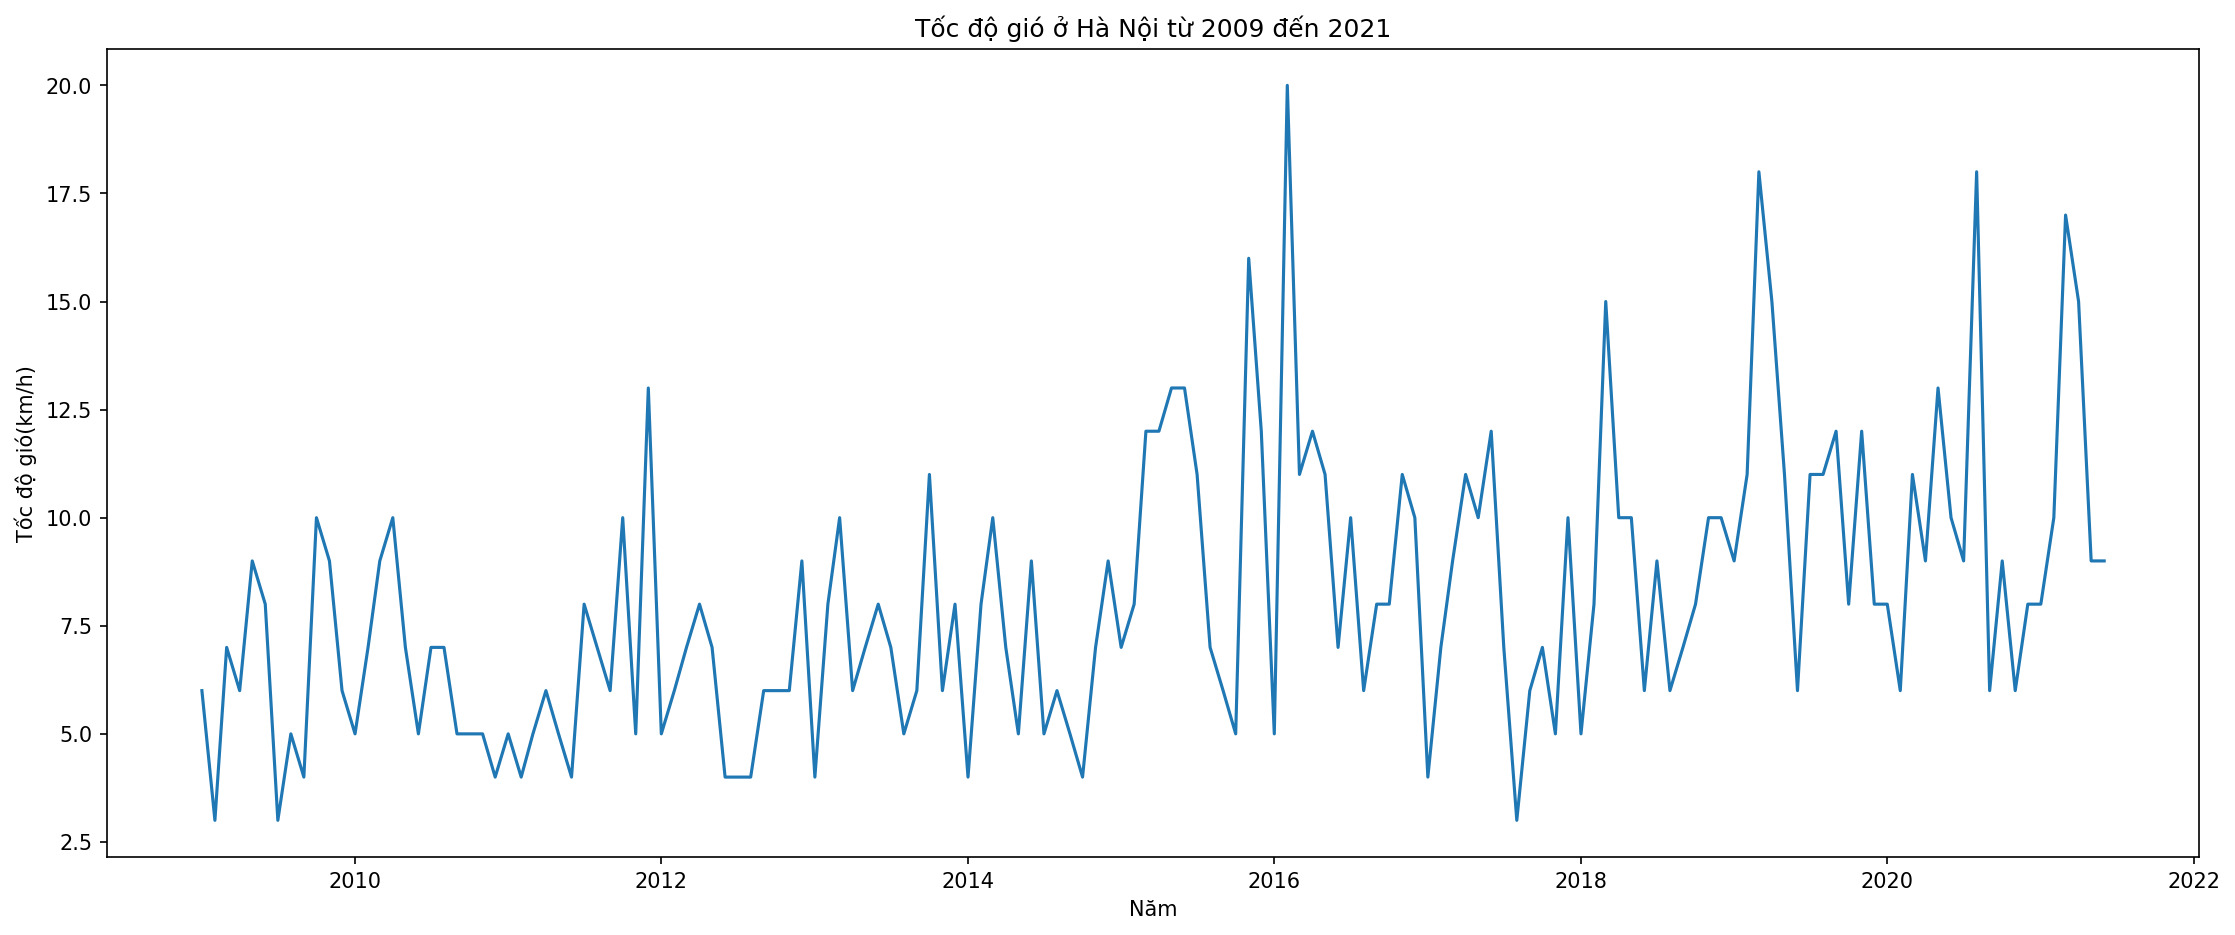

In [191]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Tốc độ gió(km/h)', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['wind'], title='Tốc độ gió ở Hà Nội từ 2009 đến 2021', color="tab:blue")

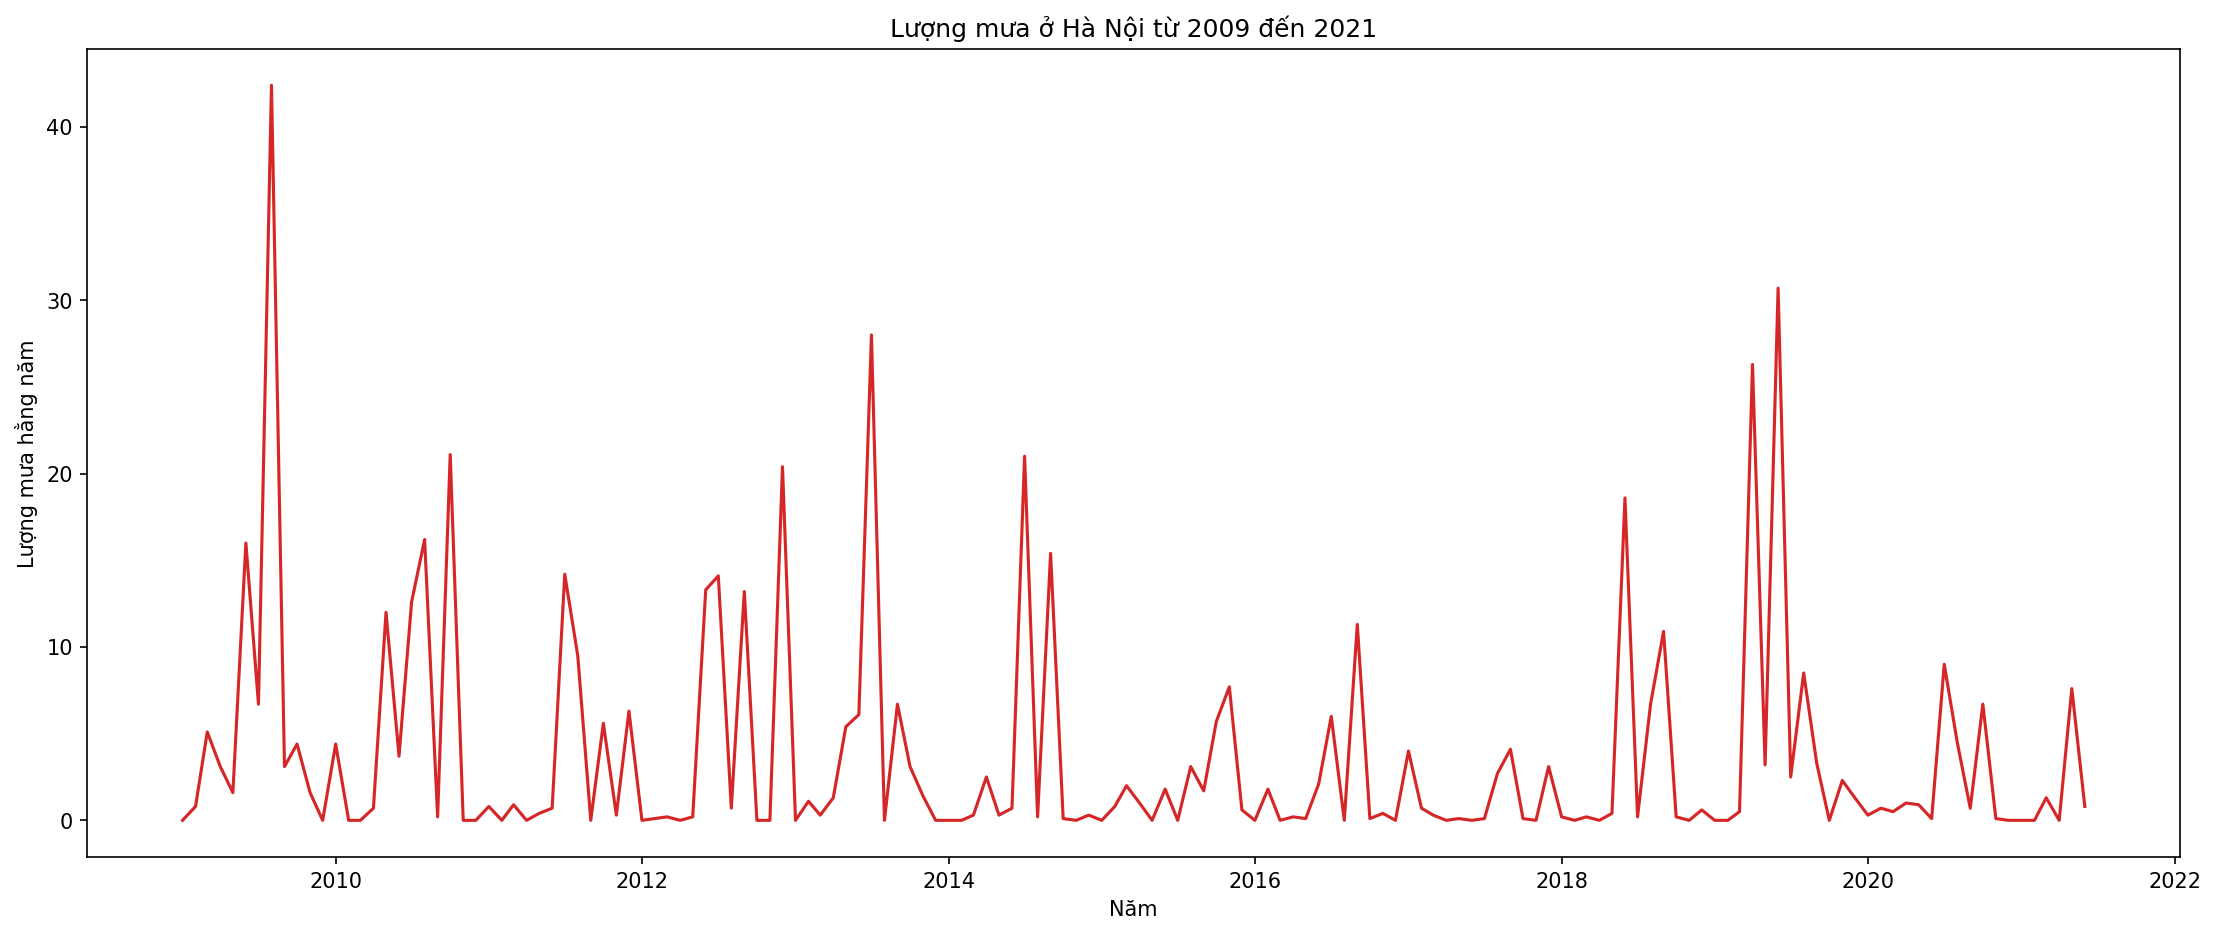

In [192]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mưa hằng năm', dpi=150, color="red"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['rain'], title='Lượng mưa ở Hà Nội từ 2009 đến 2021', color="tab:red")

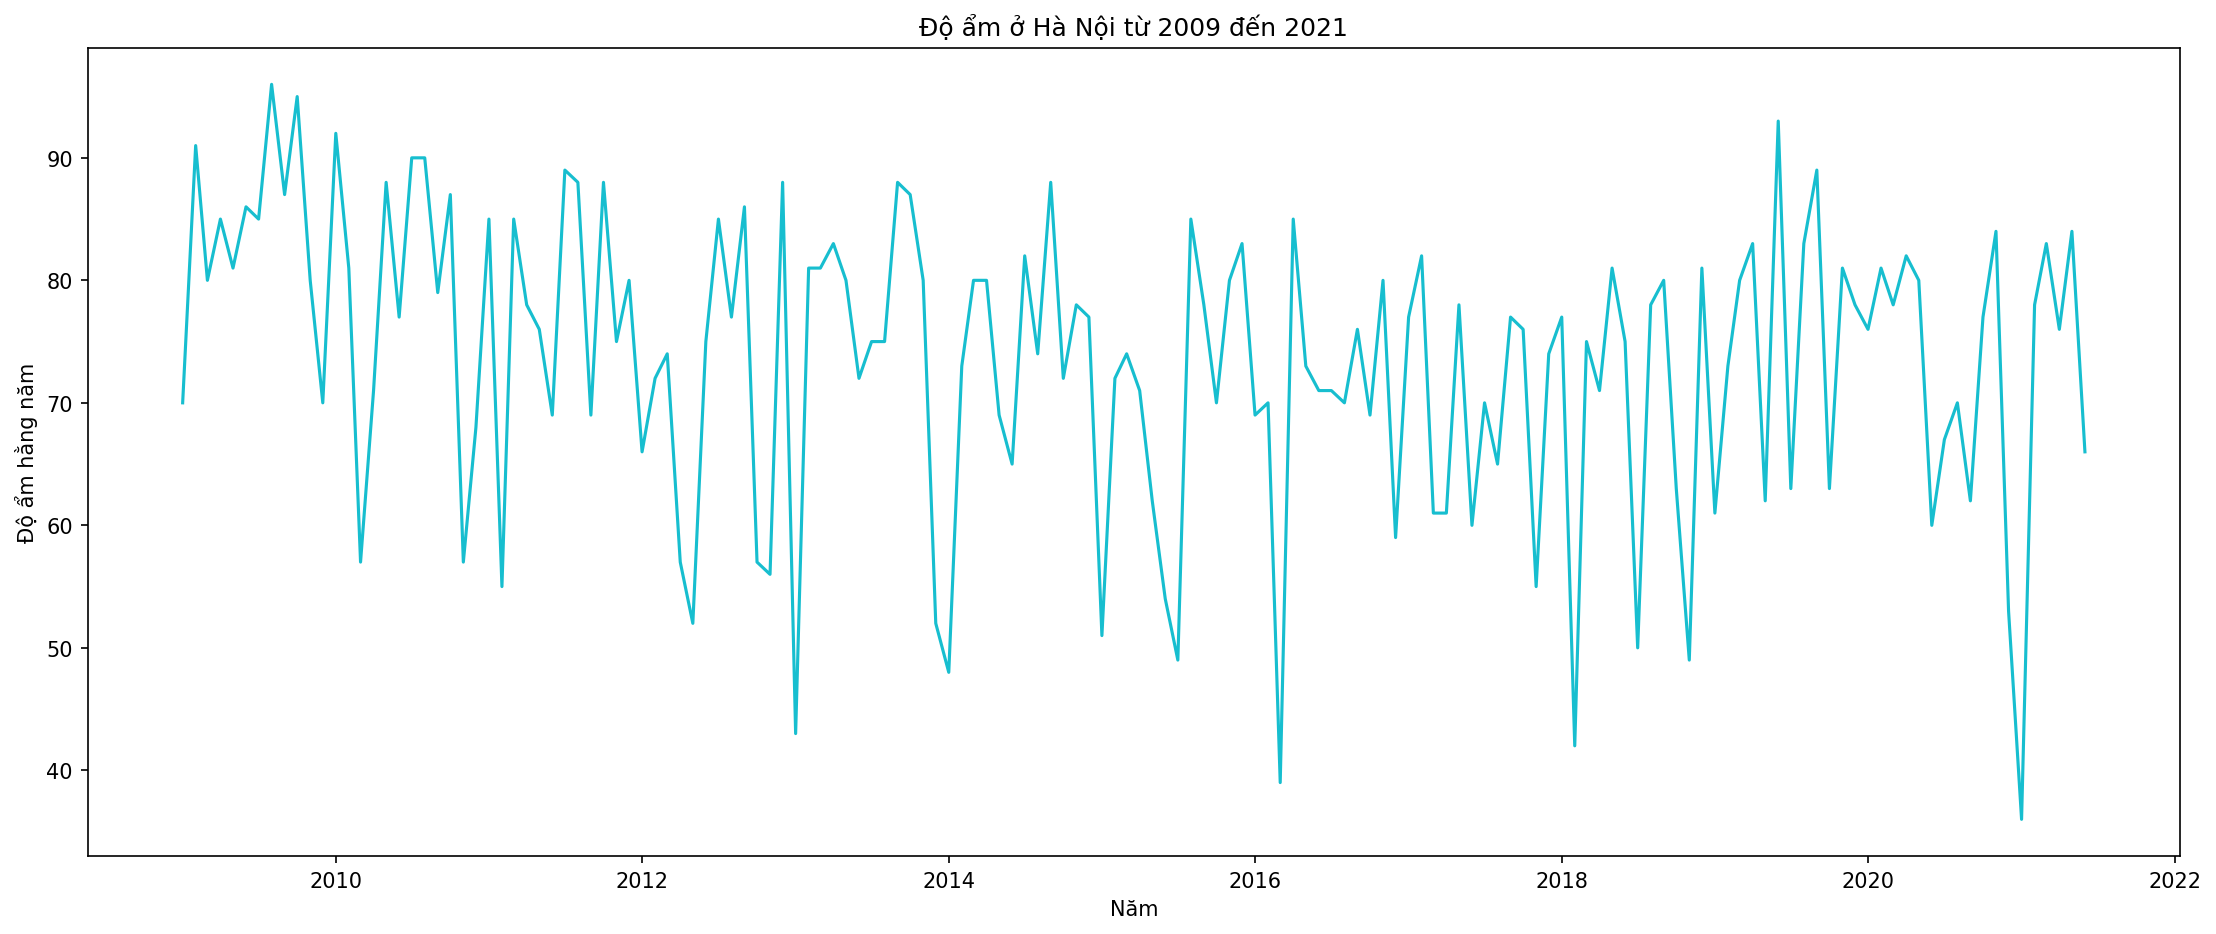

In [193]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Độ ẩm hằng năm', dpi=150, color="cyan"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['humidi'], title='Độ ẩm ở Hà Nội từ 2009 đến 2021', color="tab:cyan")

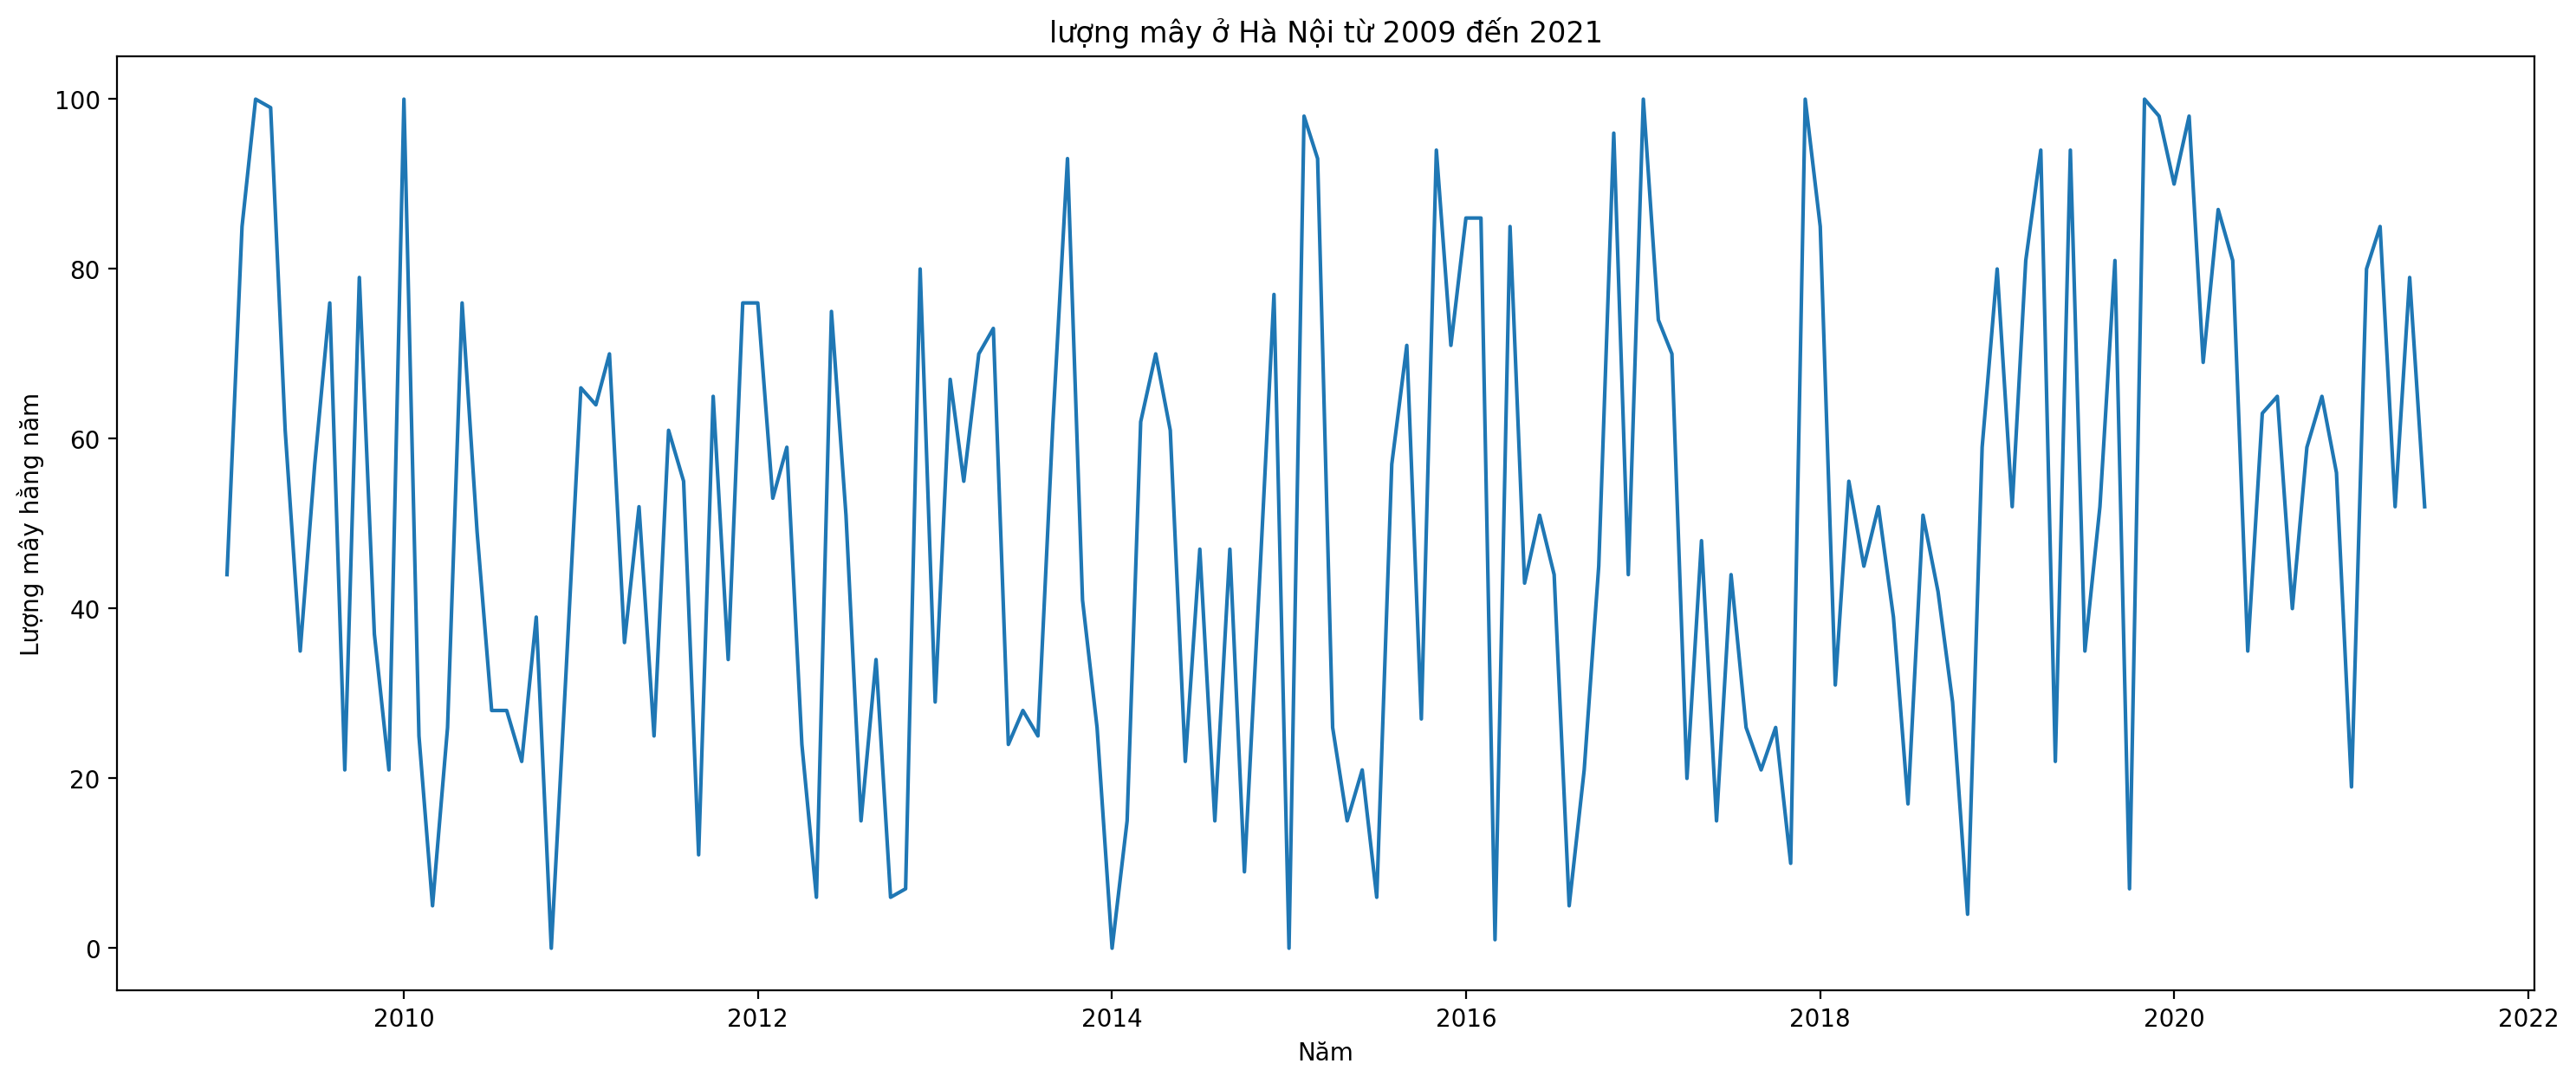

In [194]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mây hằng năm', dpi=200, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['cloud'], title='lượng mây ở Hà Nội từ 2009 đến 2021', color="tab:blue")

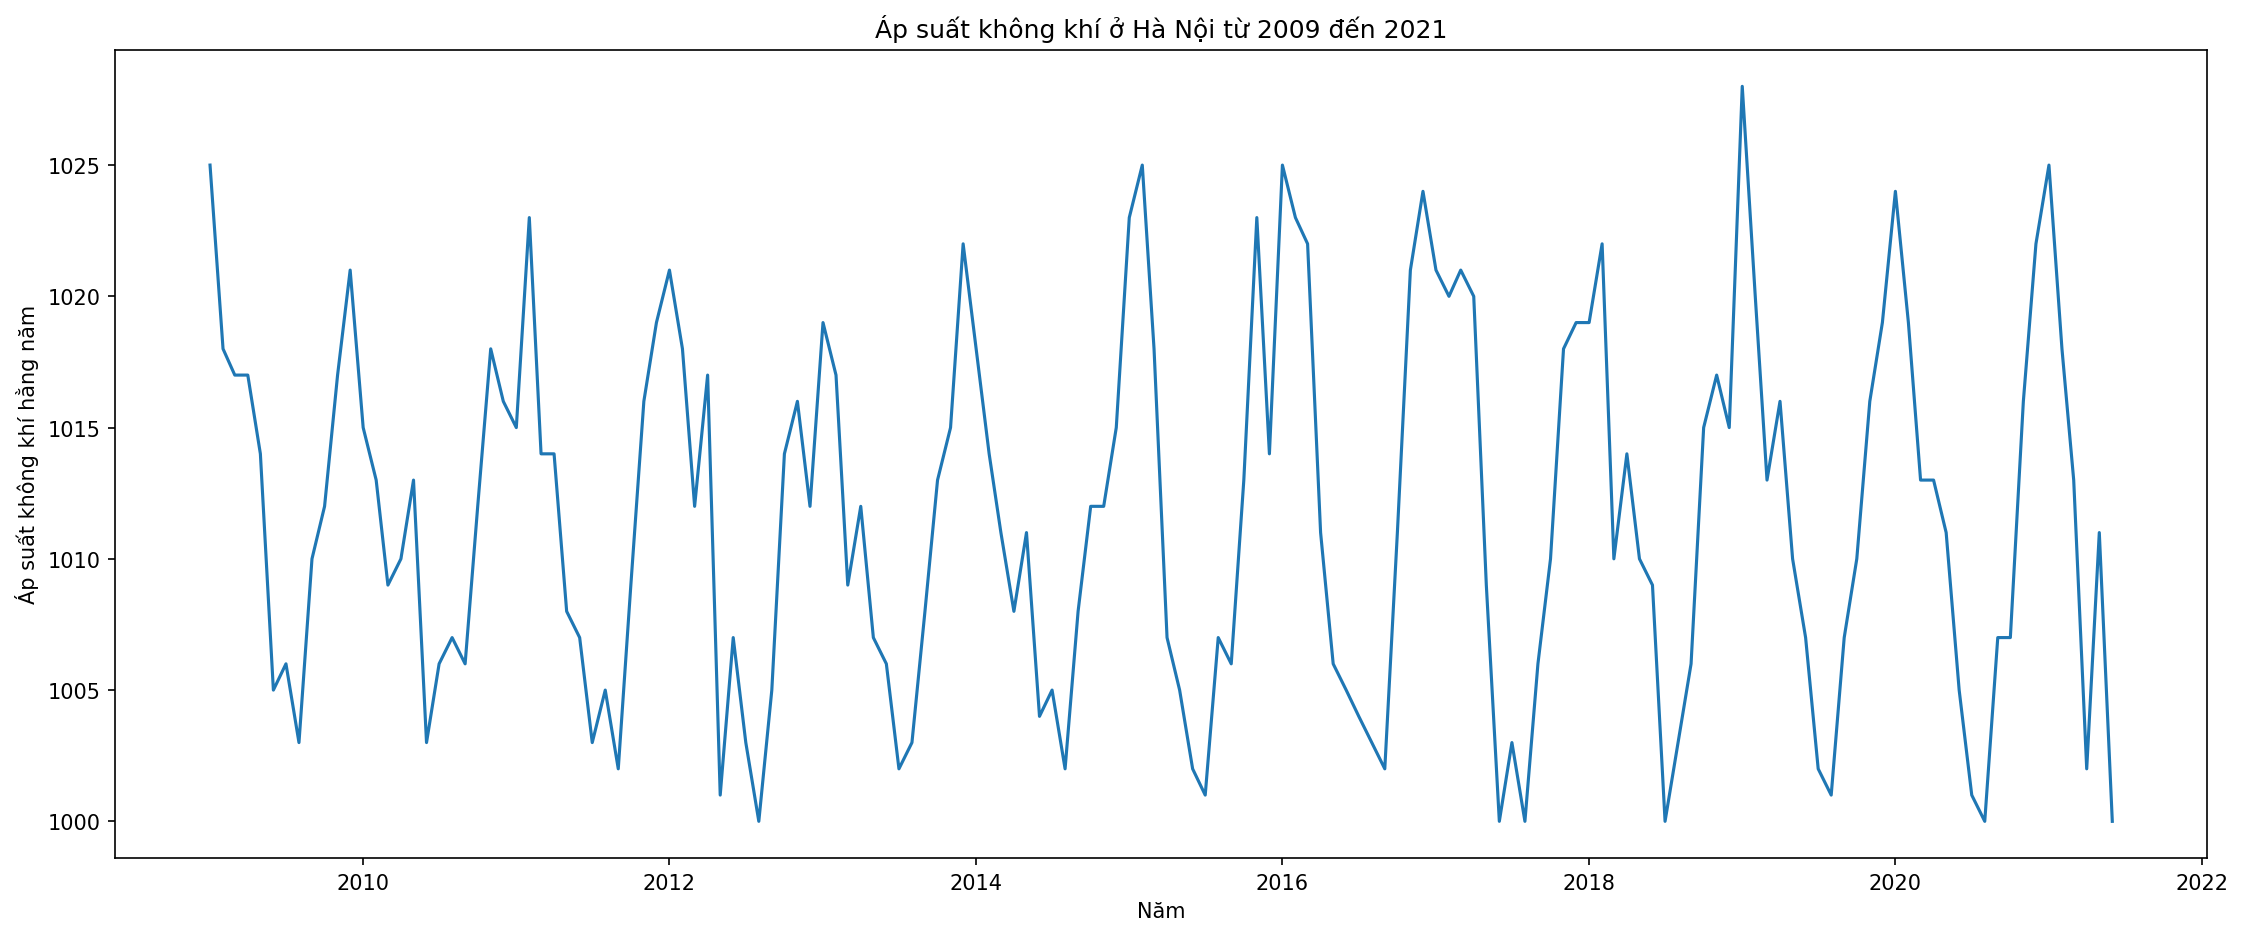

In [195]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Áp suất không khí hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['pressure'], title='Áp suất không khí ở Hà Nội từ 2009 đến 2021', color="tab:blue")

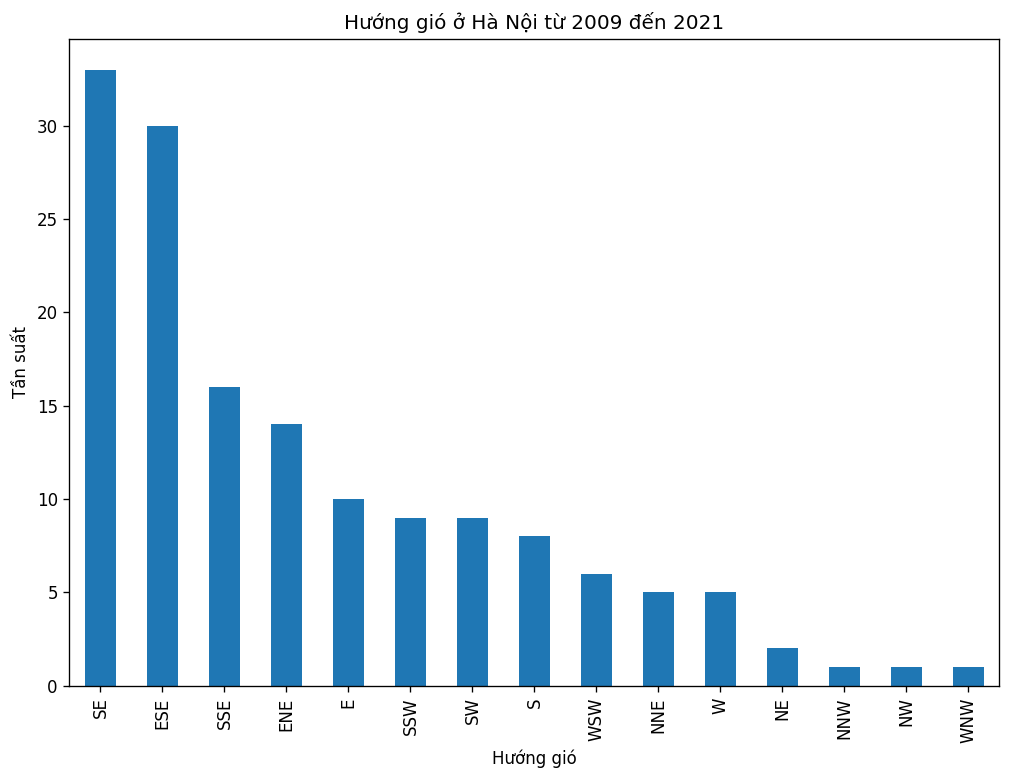

In [196]:
series = pd.Series(df['wind_d'])
frequency = series.value_counts()
frequency.plot.bar()
plt.xlabel('Hướng gió')
plt.ylabel('Tần suất')
plt.title('Hướng gió ở Hà Nội từ 2009 đến 2021')
plt.show()

# Xác định xu hướng khí hậu theo hằng năm và hằng tháng


### Xu hướng nhiệt độ

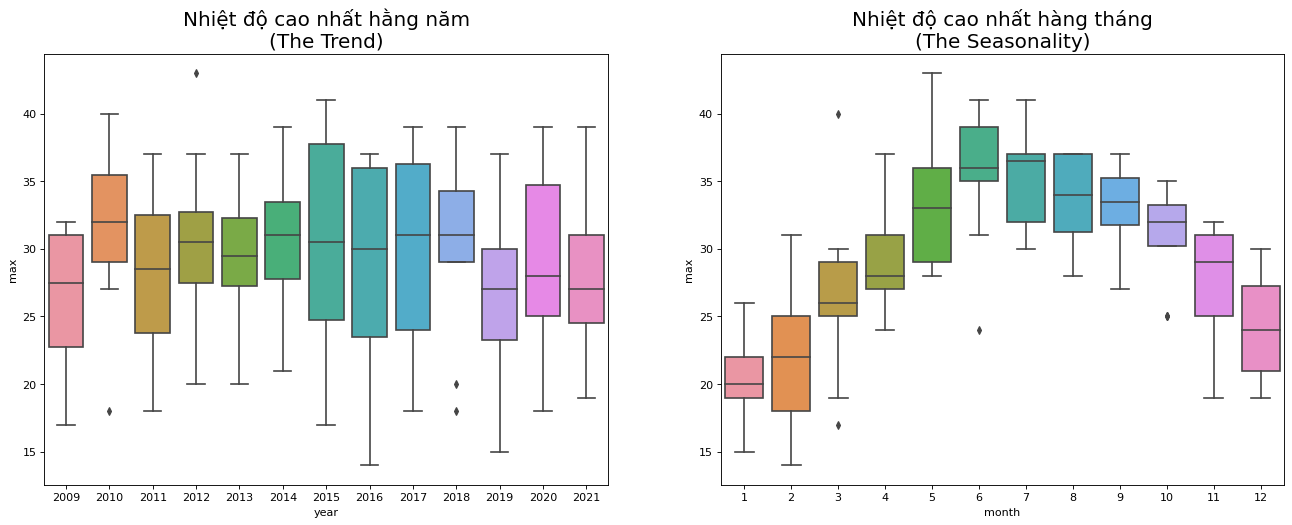

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='max', data=df, ax=axes[0])
sns.boxplot(x='month', y='max', data=df)

axes[0].set_title('Nhiệt độ cao nhất hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Nhiệt độ cao nhất hàng tháng\n(The Seasonality)', fontsize=18)
plt.show()

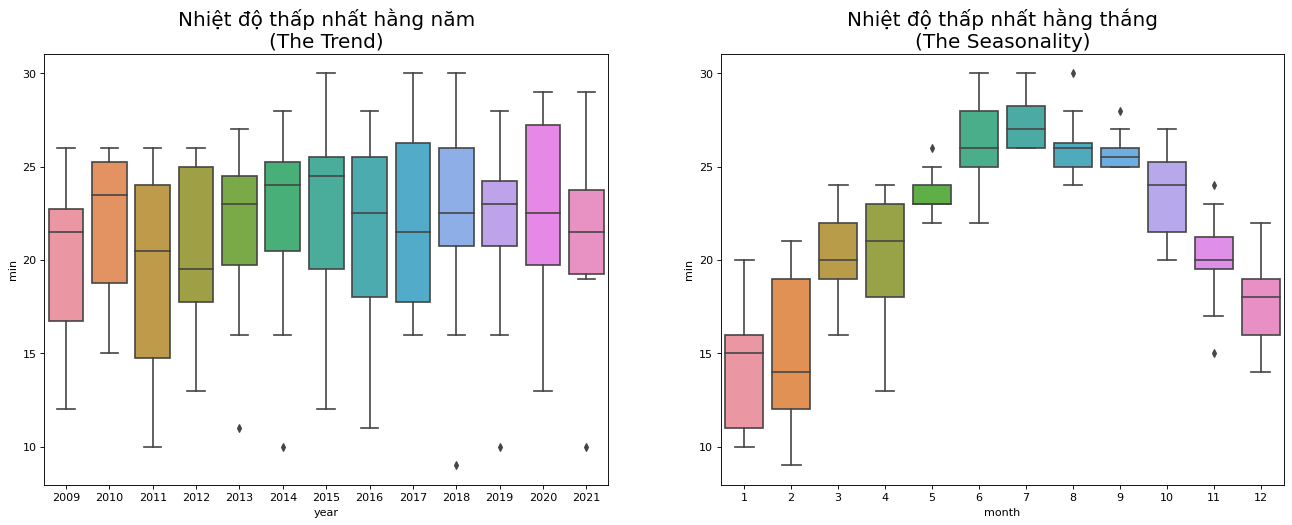

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='min', data=df, ax=axes[0])
sns.boxplot(x='month', y='min', data=df)

axes[0].set_title('Nhiệt độ thấp nhất hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Nhiệt độ thấp nhất hằng thắng\n(The Seasonality)', fontsize=18)
plt.show()

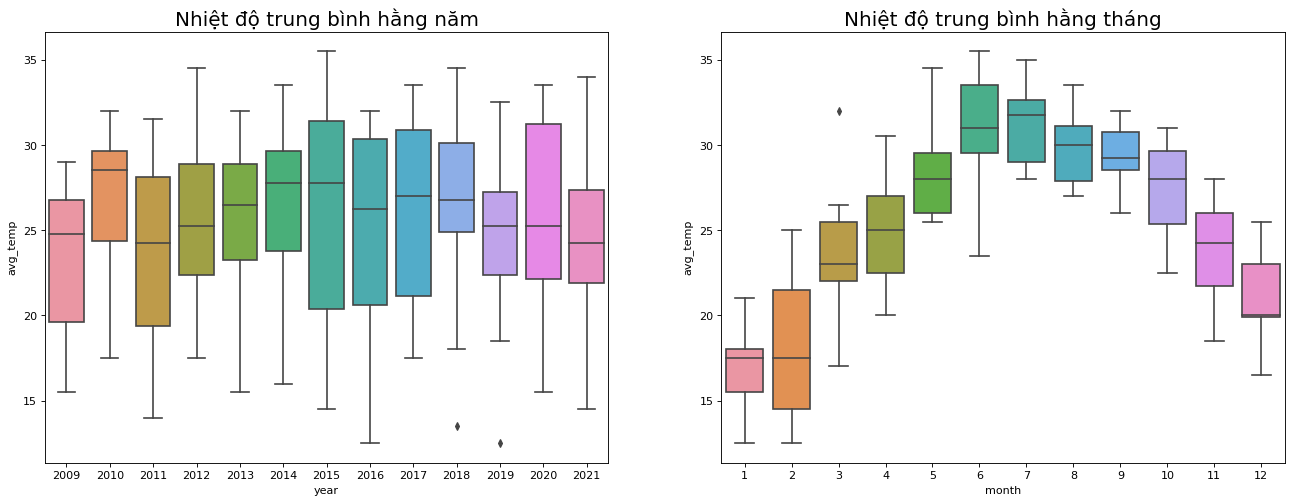

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='avg_temp', data=df, ax=axes[0])
sns.boxplot(x='month', y='avg_temp', data=df)

axes[0].set_title('Nhiệt độ trung bình hằng năm', fontsize=18); 
axes[1].set_title('Nhiệt độ trung bình hằng tháng', fontsize=18)
plt.show()

#### Đánh giá xu hướng nhiệt độ

- Năm 2010 và năm 2015 là 2 năm có nhiệt độ cao nhất vượt 40ºC.Năm 2015 là năm có nhiệt độ trung bình cao 
- Năm 2011 là năm có nhiệt độ thấp nhất khi nhiệt độ chỉ khoảng 11ºC
- Nhiệt độ cao nhất 3 năm gần nhất đang có xu hướng tăng dần 
- Từ tháng 5 đến tháng 9 là khoảng thời gian nóng nhất trong năm. Tháng có nhiệt độ cao nhất là tháng 6 >35ºC
- Mùa đông bắt đầu từ tháng 11 khi nhiệt độ bắt đầu giảm sâu kéo dài đến tháng 3 thì nhiệt độ bắt đầu tăng dễ chịu trở lại .Tháng có nhiệt độ thấp nhất là tháng 2 khi có những thời điểm <10ºC
- Năm 2015 tuy là năm có nhiệt độ trung bình cao nhất tuy nhiên vào mùa đông có những thời điểm nhiệt độ trung bình ~15ºC

### Xu hướng gió và hướng gió

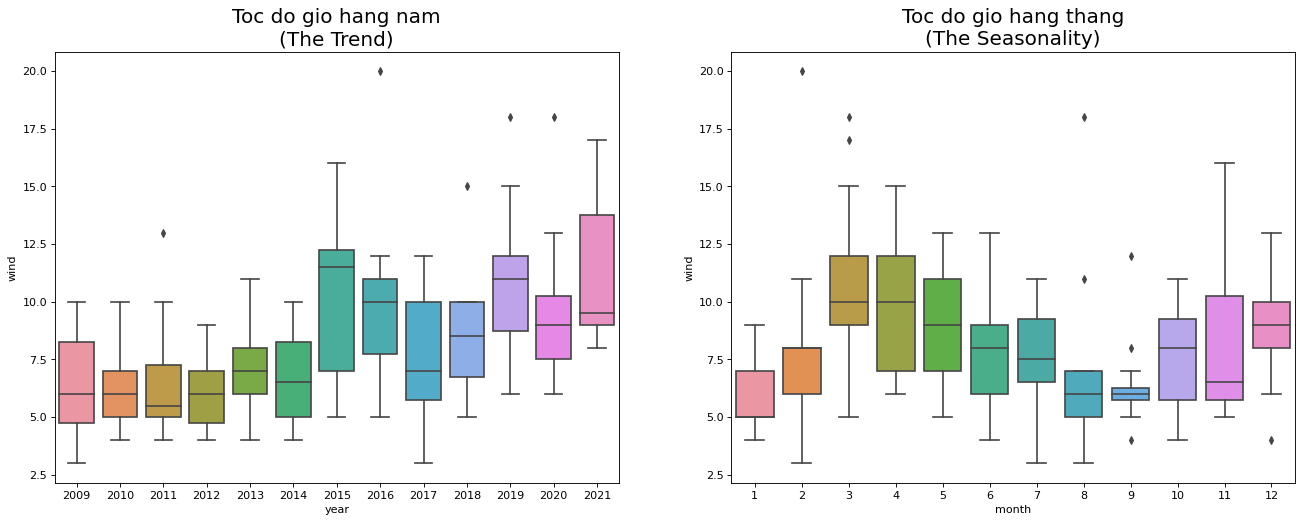

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind', data=df)

axes[0].set_title('Toc do gio hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Toc do gio hang thang\n(The Seasonality)', fontsize=18)
plt.show()

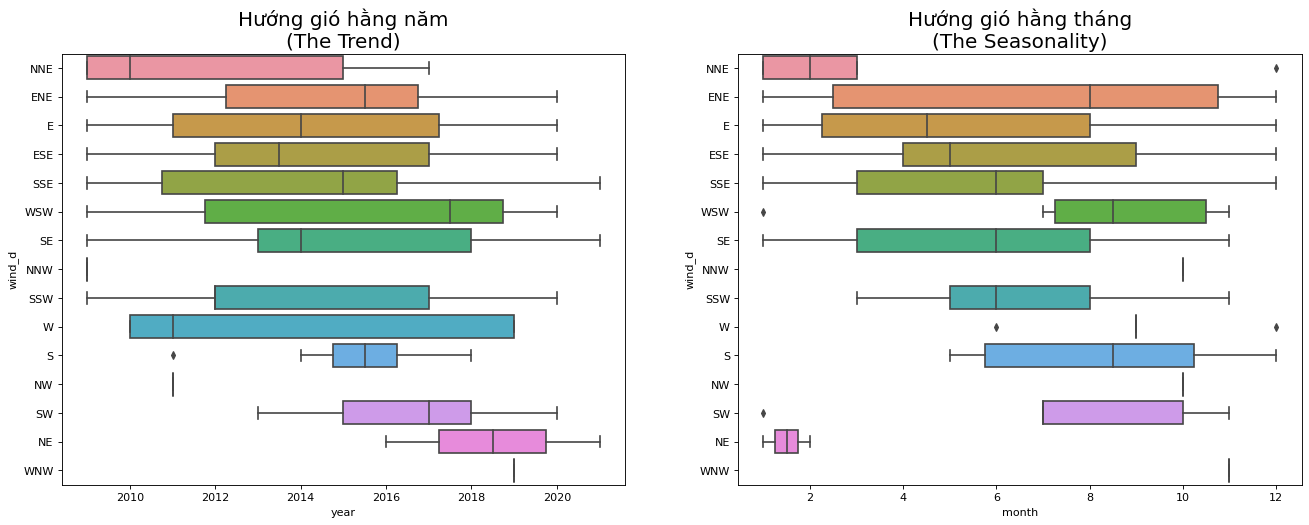

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind_d', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind_d', data=df)

axes[0].set_title('Hướng gió hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Hướng gió hằng tháng\n(The Seasonality)', fontsize=18)
plt.show()

- tốc độ gió 2016-2018 có lượng gió cao tuy nhiên năm 2021 lại là năm có lượng gió cao đột biến nhất có thể do nhiệt độ có sự biến chuyển cao
 
- từ tháng 6- tháng 9 lượng gió cao đạt đỉnh điểm
- năm 2017 là năm duy nhật mà hướng gió NW đạt giá trị cao và có hướng gió WSW , năm 2015 là duy nhất mà hướng gió NNW và WSW có giá trị
- chỉ có các hướng gió NNE,ESE,ENE,SE là hướng gió phổ biến xuất hiện cả năm và chỉ có các hướng gió NNE,ESE,ENE,SE,S,E là hướng gió phổ biến ở tất cả các năm còn 1 số hướng gió ít phổ biến chỉ xuất hiện trong những thời điểm nhất định

### Xu hướng về lượng mưa , mây và độ ẩm

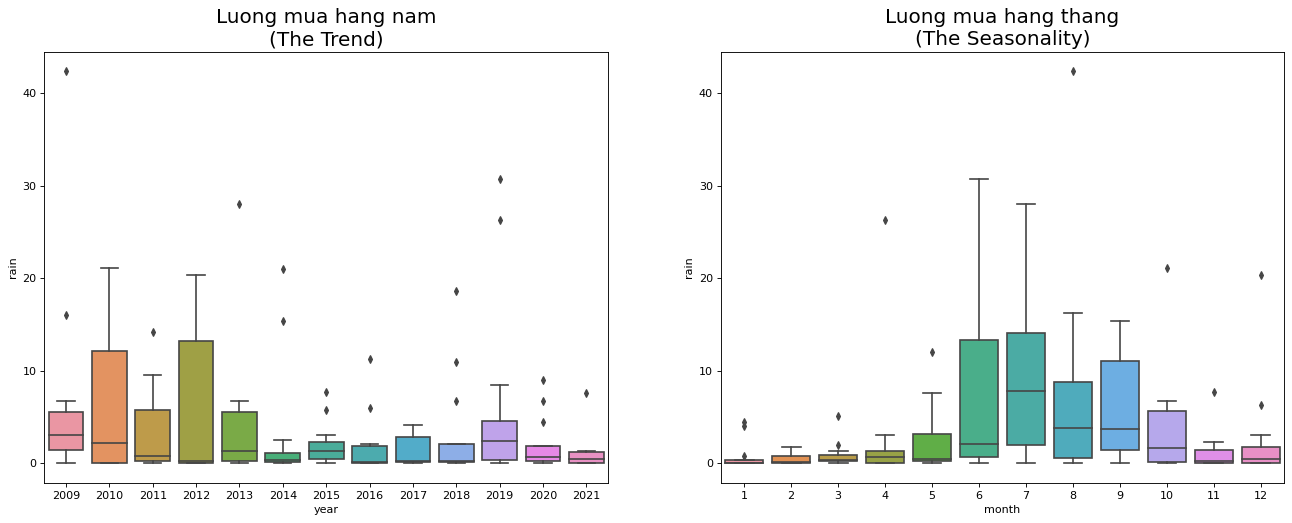

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='rain', data=df, ax=axes[0])
sns.boxplot(x='month', y='rain', data=df)

axes[0].set_title('Luong mua hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong mua hang thang\n(The Seasonality)', fontsize=18)
plt.show()

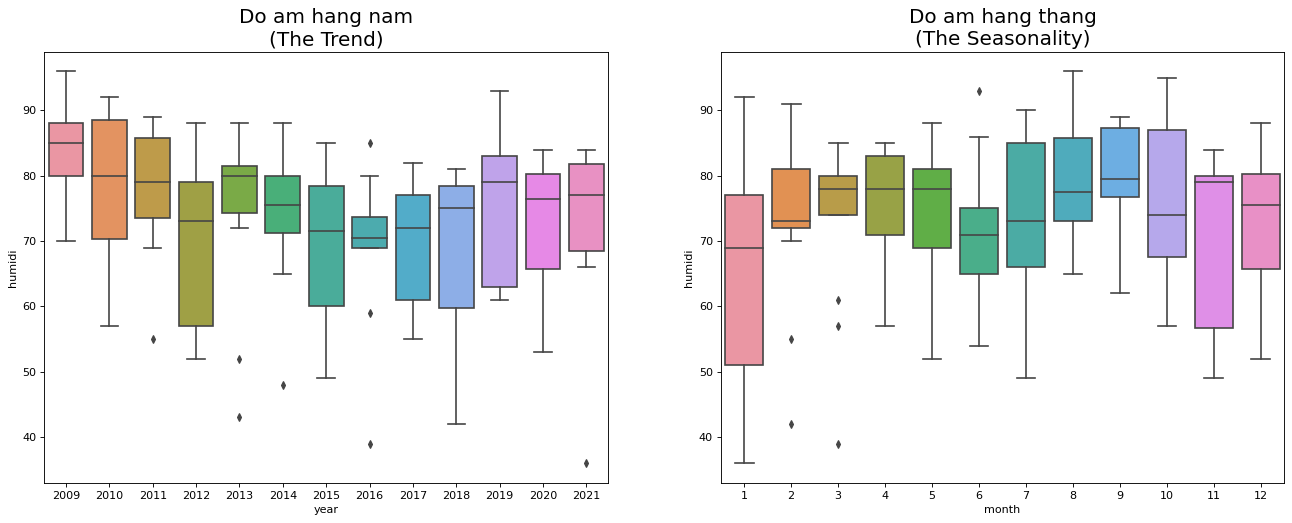

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='humidi', data=df, ax=axes[0])
sns.boxplot(x='month', y='humidi', data=df)

axes[0].set_title('Do am hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Do am hang thang\n(The Seasonality)', fontsize=18)
plt.show()

- lượng mưa năm 2017 được ghi nhận là tăng đột ngột cao nhất và năm 2013 và 2021 là 2 năm có lượng mưa trung bình thấp nhất 
- từ tháng 5 - tháng 9 được coi là mua mưa khi mà trong giai đoạn này lượng mưa được ghi nhận là rất tốt
- có thể do lượng mưa thấp mà năm 2021 và năm 2013 là 2 năm có độ ẩm trung bình thấp nhât và độ ẩm từ tháng 4 - tháng 9 là giai đoạn có độ ẩm cao nhất trong năm


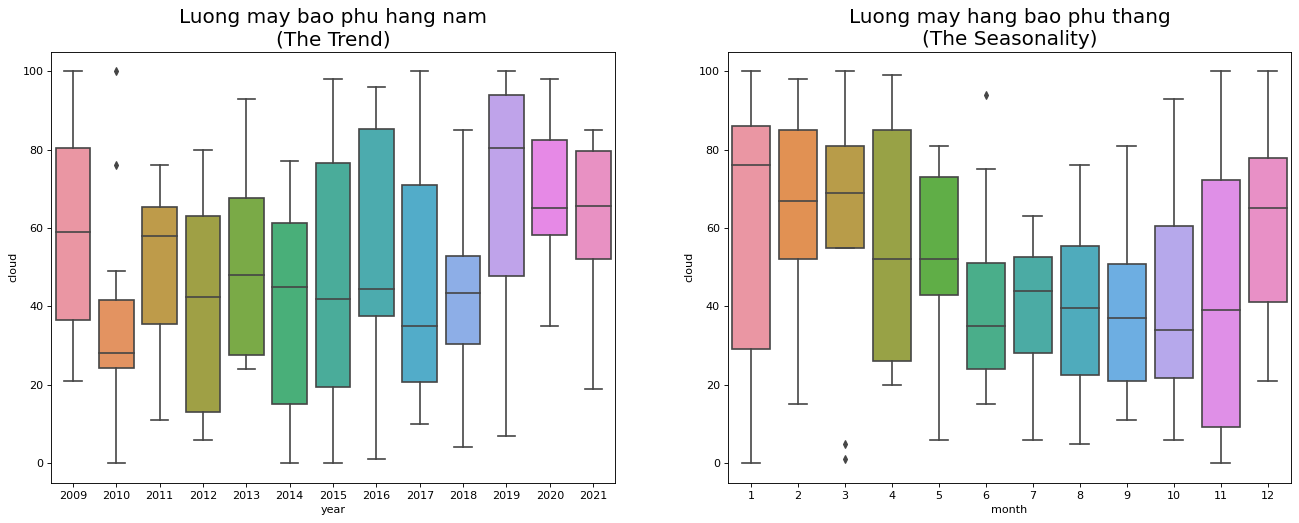

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='cloud', data=df, ax=axes[0])
sns.boxplot(x='month', y='cloud', data=df)

axes[0].set_title('Luong may bao phu hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong may hang bao phu thang\n(The Seasonality)', fontsize=18)
plt.show()

- các năm 2010-2013 và 2018-2019 là 2 giai đoạn có lượng mây bao phủ cao nhất từ tháng 10 - tháng 2 hằng năm có lượng mây bao phủ thấp nhất

### Xu hướng về áp xuất 

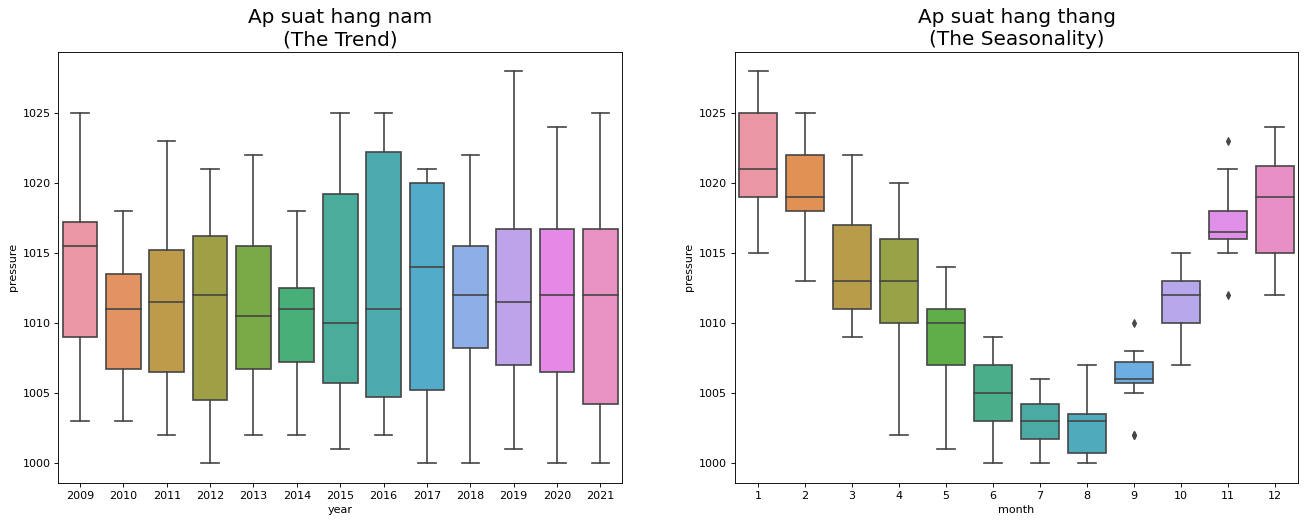

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='pressure', data=df, ax=axes[0])
sns.boxplot(x='month', y='pressure', data=df)

axes[0].set_title('Ap suat hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Ap suat hang thang\n(The Seasonality)', fontsize=18)
plt.show()

- năm 2009 và năm 2018-2019 là 2 giai đoạn được ghi nhận là có lượng áp suất trong không khí cao nhất 
- từ tháng 9-tháng 2 là khoảng thời tiết đang trong giai đoạn mùa động nhiệt độ thấp nên lượng áp suất trong không khí lúc này cũng đạt ngưỡng cao nhất
- áp suất không khí đang có xu hướng tăng lên

## Các mối tương quan trong dữ liệu

### Nhiệt độ trung bình

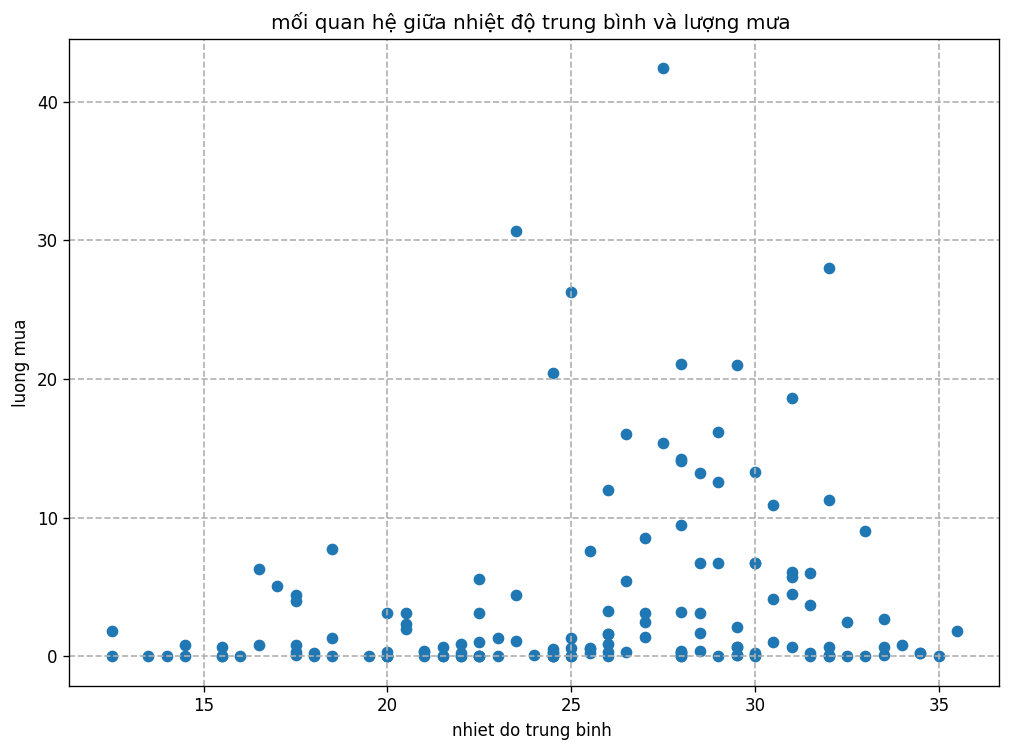

In [206]:
x = df['avg_temp']
y = df['rain']
plt.title("mối quan hệ giữa nhiệt độ trung bình và lượng mưa ")
plt.scatter(x, y)

plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiet do trung binh ")
plt.ylabel("luong mua")
plt.show()

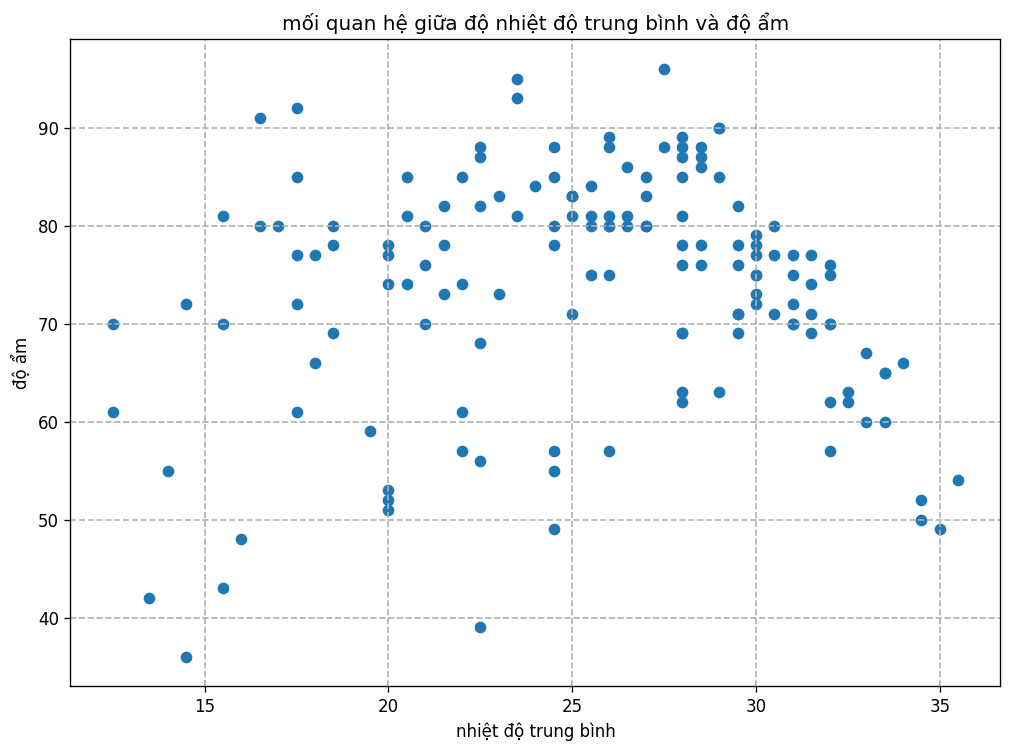

In [207]:
x = df['avg_temp']
y = df['humidi']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và độ ẩm")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("độ ẩm")
plt.show()

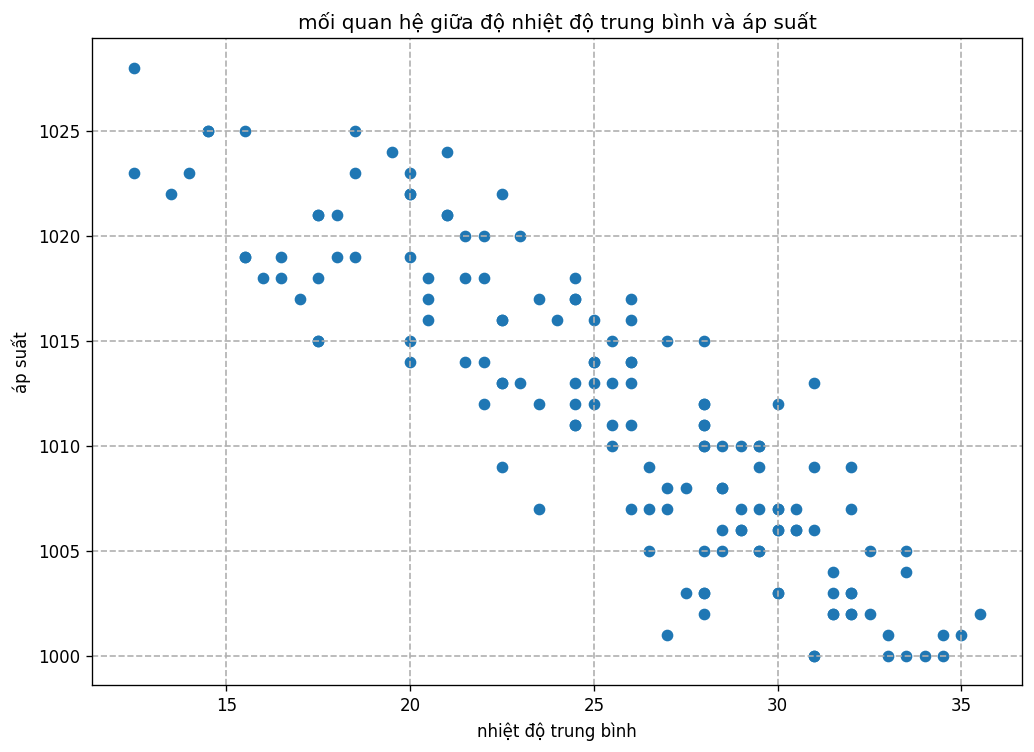

In [208]:
x = df['avg_temp']
y = df['pressure']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và áp suất")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("áp suất")
plt.show()

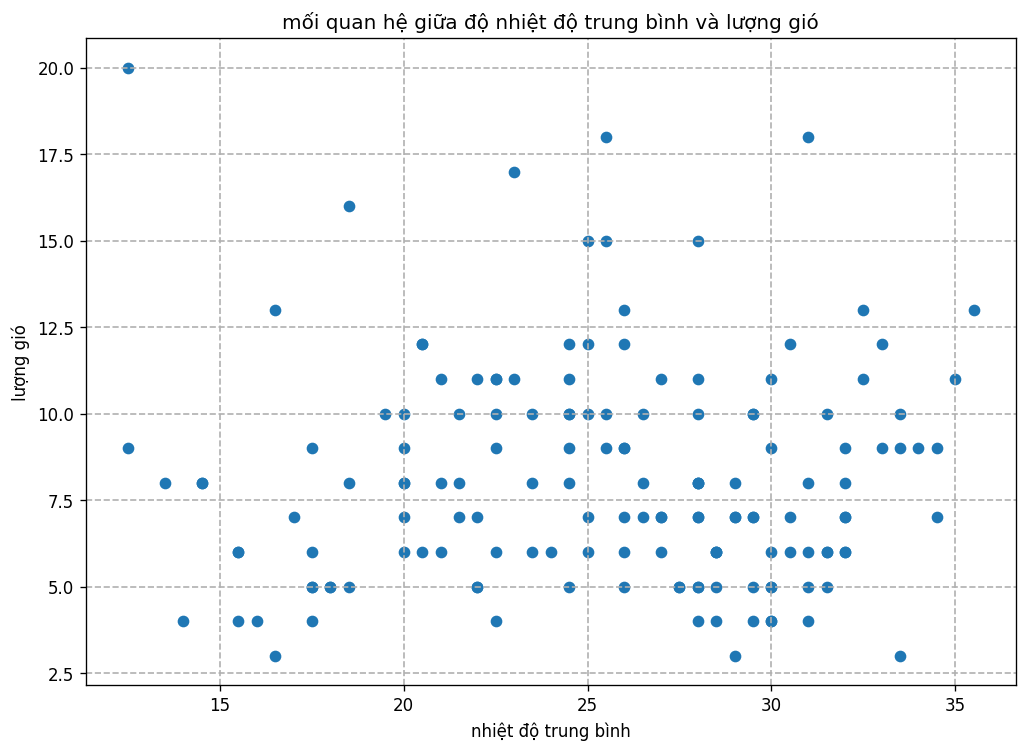

In [209]:
x = df['avg_temp']
y = df['wind']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và lượng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("lượng gió")
plt.show()

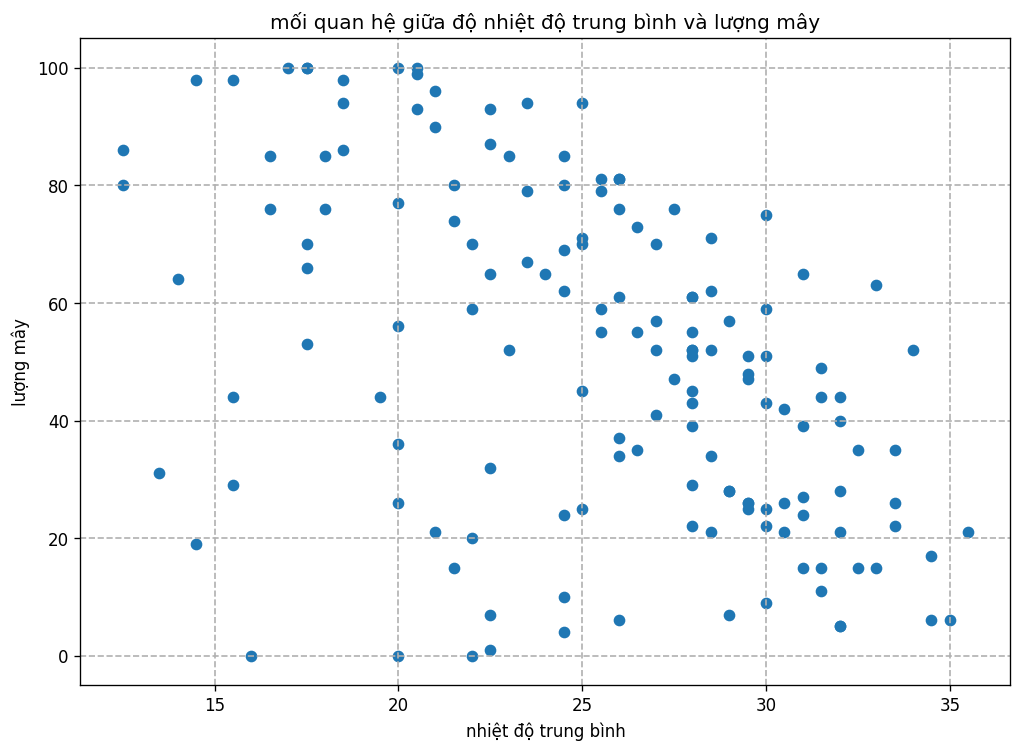

In [210]:
x = df['avg_temp']
y = df['cloud']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và lượng mây")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("lượng mây")
plt.show()

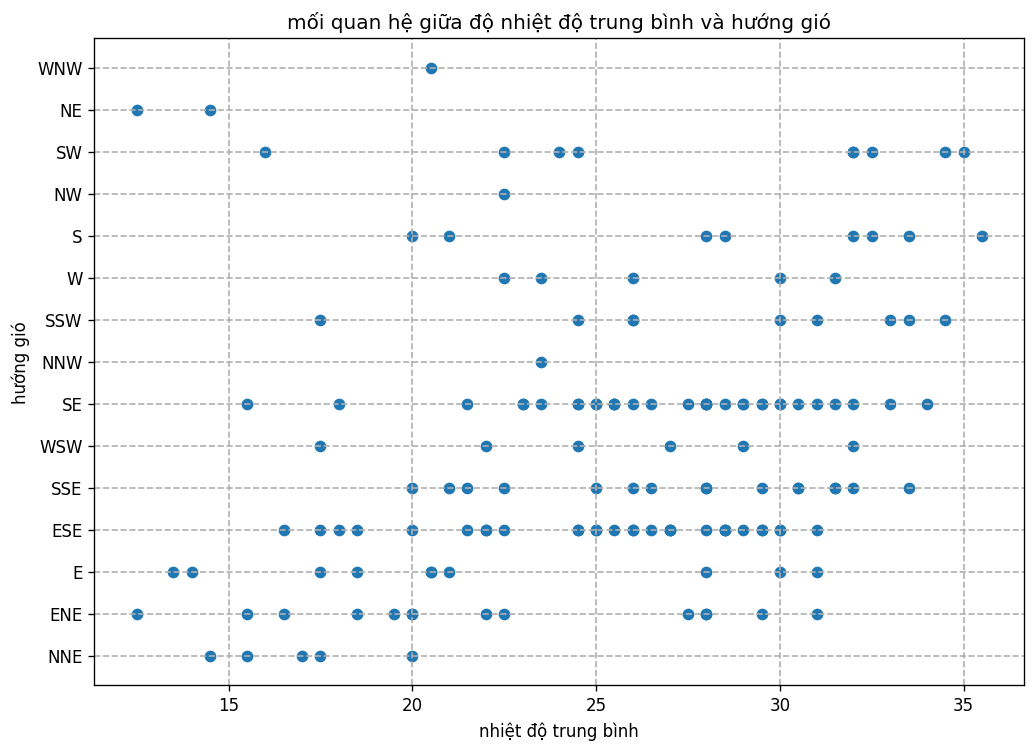

In [211]:
x = df['wind_d']
y = df['avg_temp']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và hướng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("hướng gió")
plt.ylabel("nhiệt độ trung bình")
plt.show()

### Lượng mưa

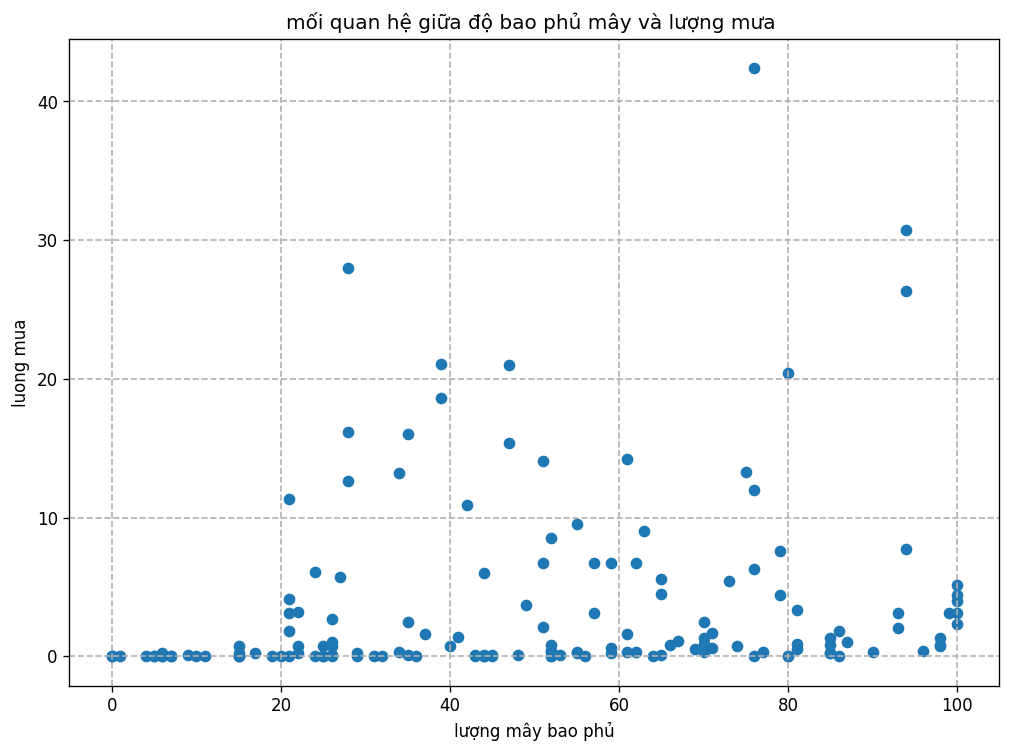

In [212]:
x = df['cloud']
y = df['rain']
plt.title("mối quan hệ giữa độ bao phủ mây và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng mây bao phủ")
plt.ylabel("luong mua")
plt.show()

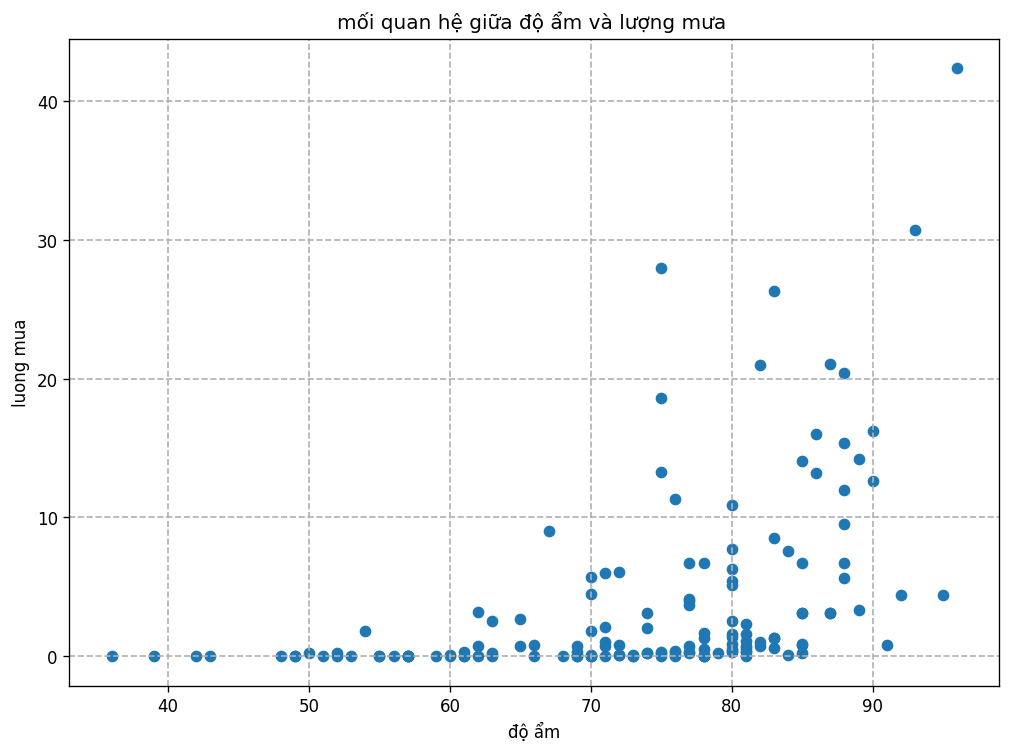

In [213]:
x = df['humidi']
y = df['rain']
plt.title("mối quan hệ giữa độ ẩm và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("độ ẩm")
plt.ylabel("luong mua")
plt.show()

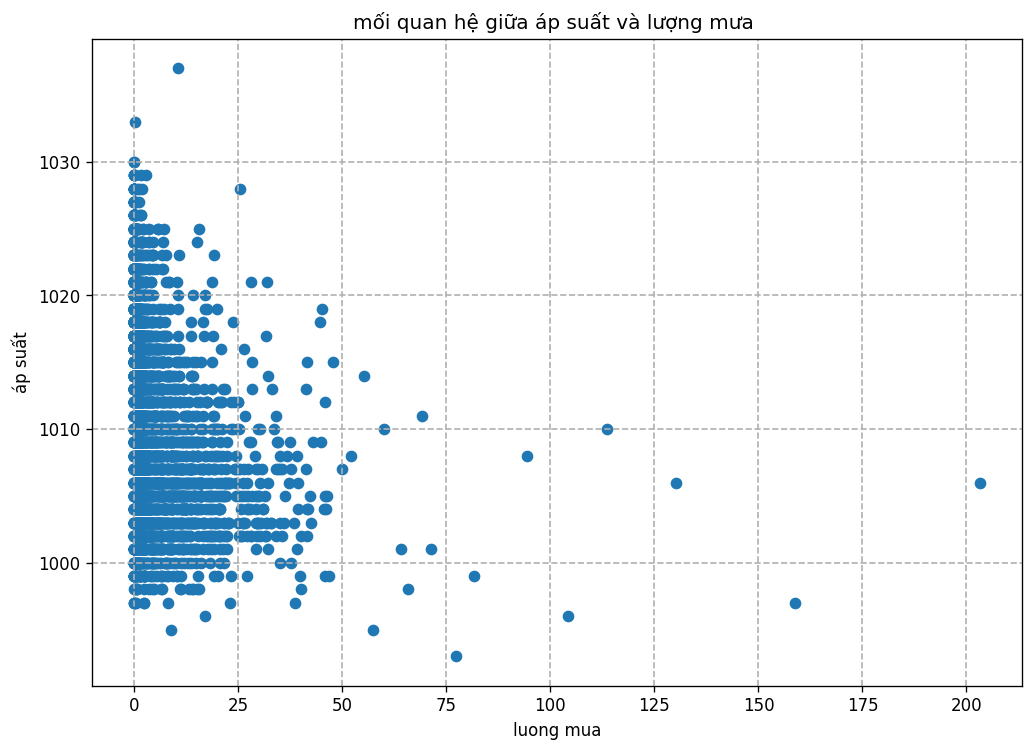

In [227]:
x = df['rain']
y = df['pressure']
plt.title("mối quan hệ giữa áp suất và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("luong mua")
plt.ylabel("áp suất")
plt.show()

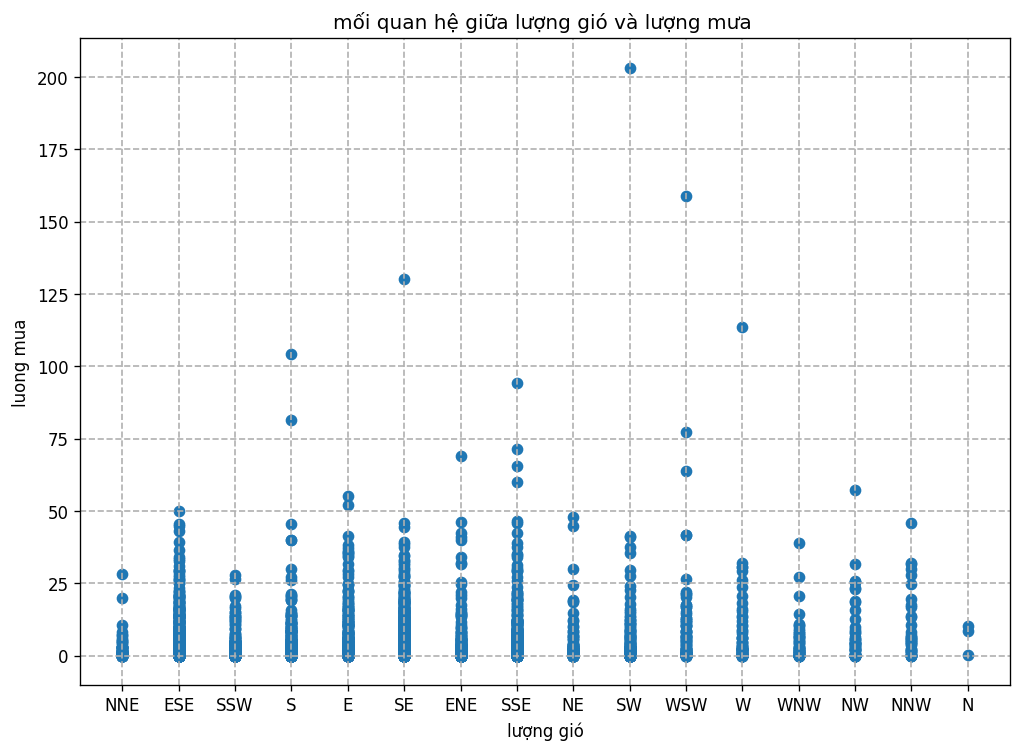

In [230]:
x = df['wind_d']
y = df['rain']
plt.title("mối quan hệ giữa lượng gió và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng gió")
plt.ylabel("luong mua")
plt.show()

### gió

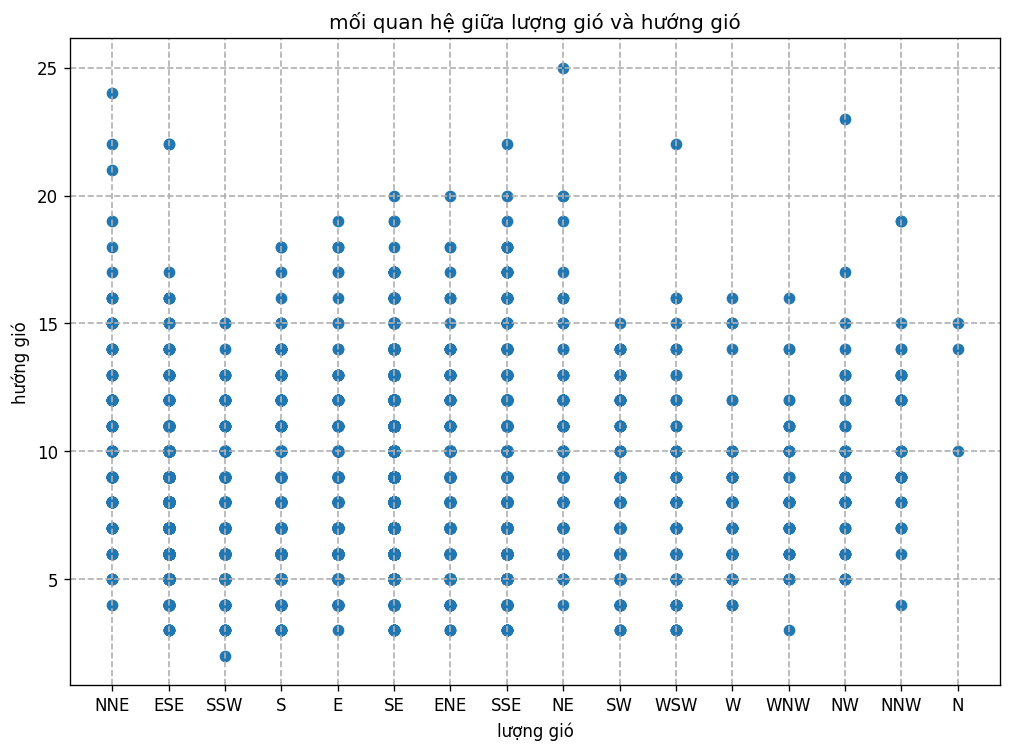

In [231]:
x = df['wind_d']
y = df['wind']
plt.title("mối quan hệ giữa lượng gió và hướng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng gió")
plt.ylabel("hướng gió")
plt.show()

## Đánh giá xu hướng khí hậu và sự ảnh hưởng

- Hà Nội có khí hậu nhiệt đới gió mùa ẩm, với mùa hè nóng và mưa nhiều, còn mùa đông lạnh và mưa ít. Nhiệt độ trung bình hàng năm là 23,6ºC, cao nhất là tháng 6 (29,8ºC), thấp nhất là tháng 1 (17,2ºC). Độ ẩm tương đối trung bình hàng năm là 79% và lượng mưa trung bình hàng năm là 1.800mm.

- Thập kỷ 2011-2020 vừa qua được ghi nhận là nóng nhất trong lịch sử.Nhiệt độ tăng lên làm gia tăng các bệnh gây ra do nhiệt độ cao và khiến việc thực hiện các công việc ngoài trời trở nên khó khăn hơn. Rủi ro cháy rừng cao hơn và lây lan nhanh hơn rất nhiều khi khí hậu nóng lên gây thiệt hại cho nông lâm nghiệp

- Tình trạng hạn hán ít mưa thường xuyên khéo dài ảnh hưởng đến mùa vụ và khiến hệ sinh thái càng dễ bị tổn thương. Khiến cho việc nguy cơ thiếu nguồn nước sạch hằng ngày. 

- lượng gió tốc độ gió đang tăng dần chứng tỏ những cơn bão lớn đang trở nên khốc liệt hơn có thể do sự biến đổi khí hậu

# Phát triển các mô hình học máy

## Mô hình Arima cho nhiệt độ cao nhất

In [214]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
import os 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [215]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [216]:
from pmdarima import auto_arima

In [217]:
from datetime import datetime


In [218]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
df = pd.read_csv("Data.csv", index_col="date", parse_dates=True, date_parser=dateparse)
df.head(12)

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure
date,,,,,,,,,
2009-01-01,Ha Noi,19,12,6,NNE,0.0,70,44,1025
2009-01-02,Ha Noi,18,12,6,ESE,0.5,65,28,1025
2009-01-03,Ha Noi,20,13,5,ESE,0.7,74,40,1022
2009-01-04,Ha Noi,25,12,5,SSW,0.0,81,46,1018
2009-01-05,Ha Noi,23,14,5,S,1.3,90,75,1017
2009-01-06,Ha Noi,23,15,5,E,2.2,88,59,1018
2009-01-07,Ha Noi,15,13,9,NNE,1.1,85,95,1023
2009-01-08,Ha Noi,15,12,8,E,0.5,78,91,1026
2009-01-09,Ha Noi,19,11,10,SE,0.1,61,23,1029


In [219]:
df['max'].isnull().sum()

0

<Axes: xlabel='date'>

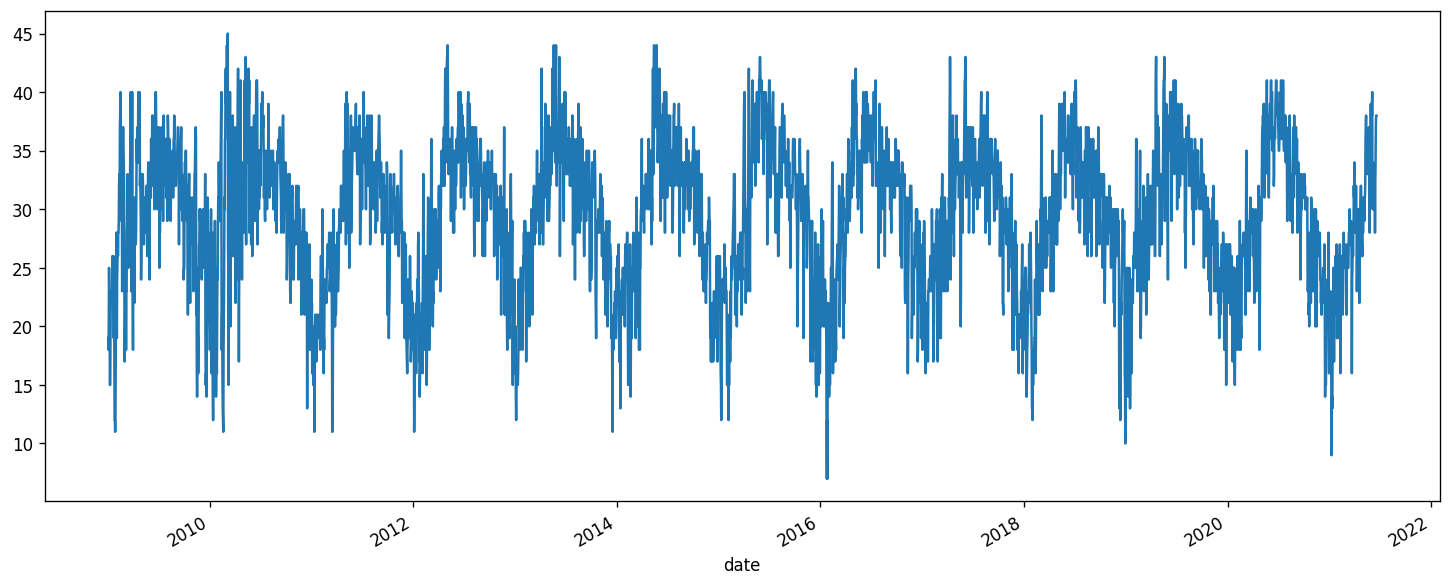

In [220]:
df['max'].plot(figsize = (15,6))

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


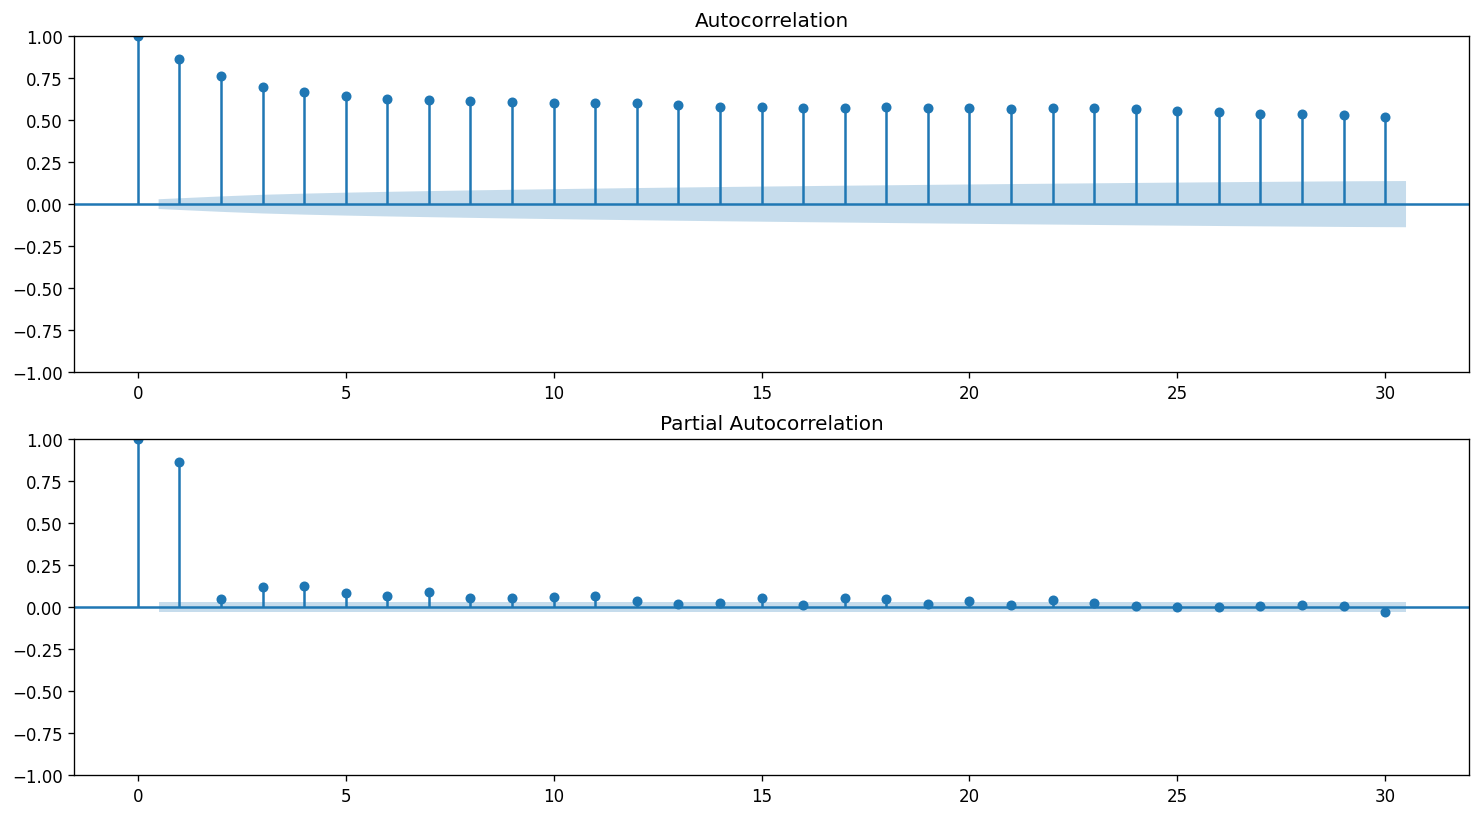

In [221]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(df['max'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(df['max'], ax=plt.gca(), lags = 30)
plt.show()

In [222]:
ts_log = np.log(df['max'])

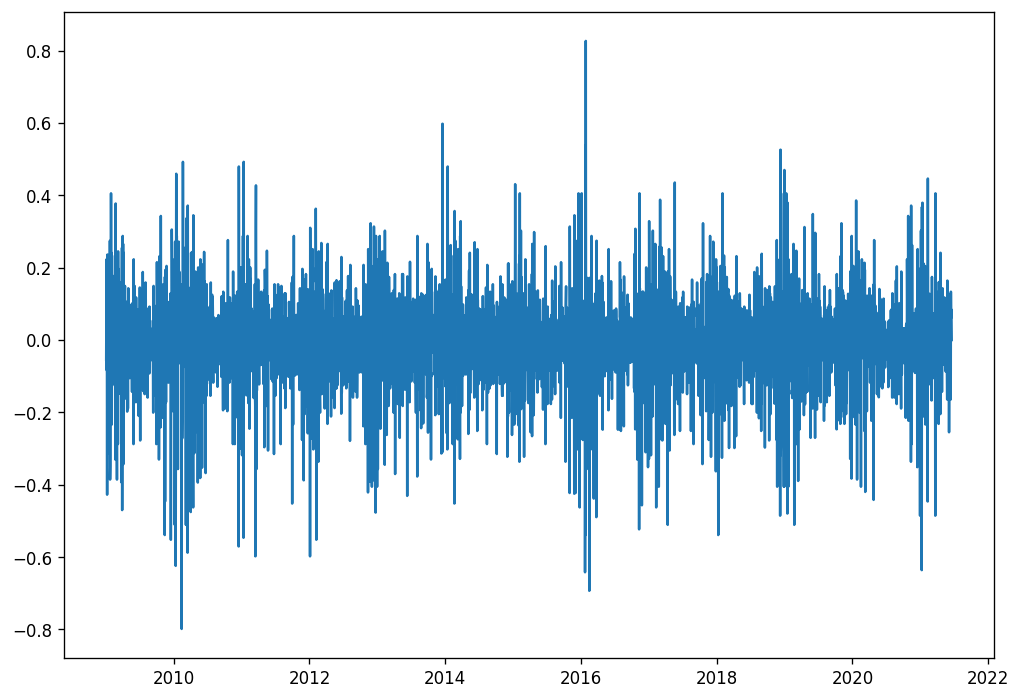

In [223]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [224]:
ts = df['max'] - df['max'].shift()
ts.dropna(inplace=True)

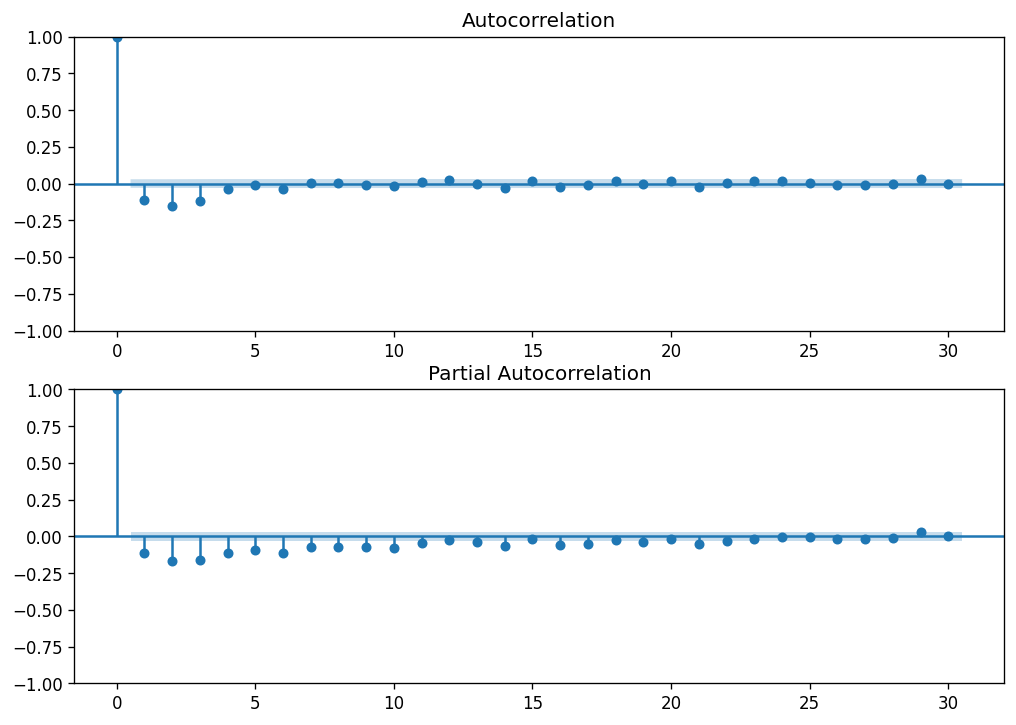

In [225]:
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()